In [1]:
# Relationships between variables (Analysis with Heatmap)
import pandas as pd

final = pd.read_csv('nyc_data_final.csv')
print(final.shape)
final.head()

(39131, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,floor,noise(dB)
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,2019-05-21,0.38,1,56.054278
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,NaN,NaN,1,56.054278
2,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,2018-11-19,0.10,1,56.054278
3,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200.0,3,74,2019-06-22,0.59,1,56.054278
4,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79.0,2,118,2017-07-21,0.99,1,56.054278


In [2]:
null_counts = final.isnull().sum()
print("\nNull Counts in Each Column:")
print(null_counts)


Null Counts in Each Column:
id                        0
name                     14
host_id                   0
host_name                16
neighbourhood_group       0
neighbourhood             0
latitude                  0
longitude                 0
room_type                 0
price                     0
minimum_nights            0
number_of_reviews         0
last_review            7991
reviews_per_month      7991
floor                     0
noise(dB)                 0
dtype: int64


In [3]:
test_data = pd.read_csv('test_data.csv')
print(test_data.shape)
test_data.head()

(9777, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,floor,noise(dB),Location
0,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,2,430,2019-06-24,3.47,1,56.054278,"Fifty Third and Eighth, 301, West 53rd Street,..."
1,5803,"Lovely Room 1, Garden, Best Area, Legal rental",9744,Laurie,Brooklyn,South Slope,40.66829,-73.98779,Private room,4,167,2019-06-24,1.34,1,69.056465,"311, 11th Street, Brooklyn, Kings County, City..."
2,6021,Wonderful Guest Bedroom in Manhattan for SINGLES,11528,Claudio,Manhattan,Upper West Side,40.79826,-73.96113,Private room,2,113,2019-07-05,0.91,1,56.054278,"38, West 106th Street, Upper West Side, Manhat..."
3,8490,"MAISON DES SIRENES1,bohemian apartment",25183,Nathalie,Brooklyn,Bedford-Stuyvesant,40.68371,-73.94028,Entire home/apt,2,88,2019-06-19,0.73,1,69.056465,"391, Hancock Street, Bedford-Stuyvesant, Brook..."
4,8505,Sunny Bedroom Across Prospect Park,25326,Gregory,Brooklyn,Windsor Terrace,40.65599,-73.97519,Private room,1,19,2019-06-23,1.37,1,69.056465,"199, Terrace Place, Brooklyn, Kings County, Ci..."


In [8]:
test_data['Location'].iloc[5]

'104, Post Avenue, Manhattan Community Board 12, Manhattan, New York County, City of New York, New York, 10034, United States'

In [1728]:
test_data2 = pd.read_csv('test_data.csv')
test3 = test_data2[['neighbourhood_group', 'neighbourhood']]
print(test3)

     neighbourhood_group       neighbourhood
0              Manhattan      Hell's Kitchen
1               Brooklyn         South Slope
2              Manhattan     Upper West Side
3               Brooklyn  Bedford-Stuyvesant
4               Brooklyn     Windsor Terrace
...                  ...                 ...
9772           Manhattan              Inwood
9773              Queens           Briarwood
9774            Brooklyn           Gravesend
9775            Brooklyn        Williamsburg
9776           Manhattan         East Harlem

[9777 rows x 2 columns]


In [1729]:
null_counts = test_data.isnull().sum()
print("\nNull Counts in Each Column:")
print(null_counts)


Null Counts in Each Column:
id                        0
name                      2
host_id                   0
host_name                 5
neighbourhood_group       0
neighbourhood             0
latitude                  0
longitude                 0
room_type                 0
minimum_nights            0
number_of_reviews         0
last_review            2074
reviews_per_month      2074
floor                     0
noise(dB)                 0
Location                  0
dtype: int64


In [1730]:
# The biggest null values that need to be taken care of are 'last_review' and 'reviews_per_month'
# There are lots of null values.
# Let us add a column days since last review
# For null values in the 'last_review', we could set the date as an arbitrary old date
# OR we could convert the column, to days since last review, and set it to a very large number
# We could also deal with null values by filling it with the mean or median

print(test_data['last_review'].dtype)
print(final['last_review'].dtype)

object
object


In [1731]:
# Create new column variable for test_data and final 'days_since_last_rev'
from datetime import datetime
test_data['last_review'] = pd.to_datetime(test_data['last_review'])
reference_date = datetime.now()
test_data['days_since_last_rev'] = (reference_date - test_data['last_review']).dt.days

final['last_review'] = pd.to_datetime(final['last_review'])
reference_date = datetime.now()
final['days_since_last_rev'] = (reference_date - final['last_review']).dt.days

print(test_data['last_review'].dtype)
print(final['last_review'].dtype)

datetime64[ns]
datetime64[ns]


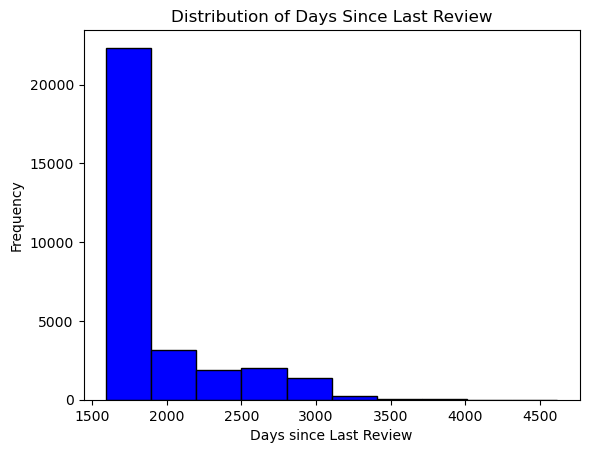

In [1732]:
import matplotlib.pyplot as plt

#Exploring distribution of days since last review so that we can deal with null values appropriately
plt.hist(final['days_since_last_rev'], bins=10, color='blue', edgecolor='black')
plt.title('Distribution of Days Since Last Review')
plt.xlabel('Days since Last Review')
plt.ylabel('Frequency')
plt.show()

In [1733]:
final.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,floor,noise(dB),days_since_last_rev
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,2019-05-21,0.38,1,56.054278,1641.0
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,NaT,NaN,1,56.054278,NaN
2,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,2018-11-19,0.10,1,56.054278,1824.0
3,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200.0,3,74,2019-06-22,0.59,1,56.054278,1609.0
4,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79.0,2,118,2017-07-21,0.99,1,56.054278,2310.0


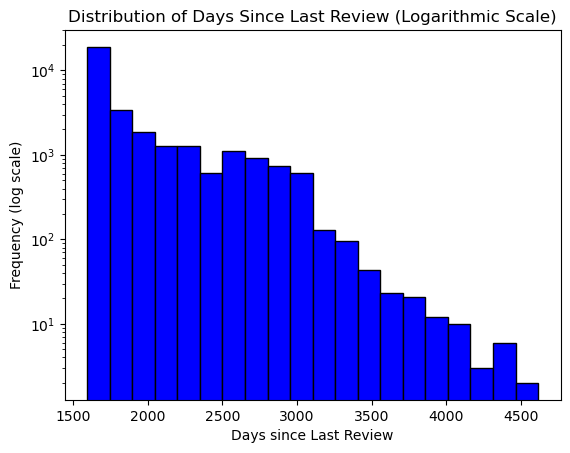

In [1734]:
plt.hist(final['days_since_last_rev'], bins=20, color='blue', edgecolor='black', log=True)
plt.title('Distribution of Days Since Last Review (Logarithmic Scale)')
plt.xlabel('Days since Last Review')
plt.ylabel('Frequency (log scale)')
plt.show()

In [1735]:
median_value = final['days_since_last_rev'].median()
mean_value = final['days_since_last_rev'].mean()
print("Median days since last review: ", median_value, "Mean days since last review: ", mean_value)

Median days since last review:  1643.0 Mean days since last review:  1870.2359666024406


In [1736]:
Q1 = final['days_since_last_rev'].quantile(0.25)
Q3 = final['days_since_last_rev'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("Upper bound: ", upper_bound, "Q3: ", Q3)

max_days = final['days_since_last_rev'].max()
print("Max days: ", max_days)

Upper bound:  2485.5 Q3:  1959.0
Max days:  4617.0


In [1737]:
# Right now I am thinking of several ways of dealing with null values of days_since_last_review
# 1. Filling it with the median number of days
# 2. Filling it with the upper bound outlier threshold, which suggests that it has been a long time since a review
# has been posted. This supports the logic that a review was never posted, and hence it has been a long time since a 
# review has been posted.
# 3. Adding another variable has_reviews, which will be 1 if there are reviews and 0 if there are 0 reviews or NULL
# reviews per month.

#I will add all these variables
final['days_since_last_rev_median'] = final['days_since_last_rev'].fillna(median_value)
final['days_since_last_rev_UB'] = final['days_since_last_rev'].fillna(upper_bound)
final['days_since_last_rev_max'] = final['days_since_last_rev'].fillna(max_days)

test_data['days_since_last_rev_median'] = test_data['days_since_last_rev'].fillna(median_value)

In [1738]:
rows_same_null = final['last_review'].isnull() == final['reviews_per_month'].isnull()
print("Are rows with null in 'days_since_last_rev' the same as null in 'reviews_per_month'?")
print(rows_same_null.all())

Are rows with null in 'days_since_last_rev' the same as null in 'reviews_per_month'?
True


In [1739]:
final['reviews_per_month'] = final['reviews_per_month'].fillna(0)
test_data['reviews_per_month'] = test_data['reviews_per_month'].fillna(0)
final.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,floor,noise(dB),days_since_last_rev,days_since_last_rev_median,days_since_last_rev_UB,days_since_last_rev_max
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,2019-05-21,0.38,1,56.054278,1641.0,1641.0,1641.0,1641.0
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,NaT,0.00,1,56.054278,NaN,1643.0,2485.5,4617.0
2,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,2018-11-19,0.10,1,56.054278,1824.0,1824.0,1824.0,1824.0
3,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200.0,3,74,2019-06-22,0.59,1,56.054278,1609.0,1609.0,1609.0,1609.0
4,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79.0,2,118,2017-07-21,0.99,1,56.054278,2310.0,2310.0,2310.0,2310.0


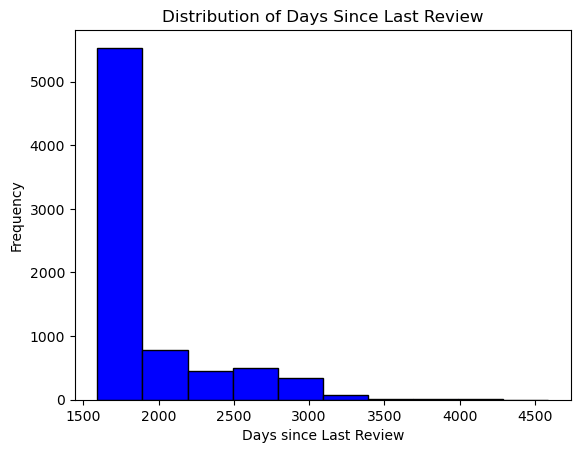

In [1740]:
# Now I am going to repeat this process for test_df
plt.hist(test_data['days_since_last_rev'], bins=10, color='blue', edgecolor='black')
plt.title('Distribution of Days Since Last Review')
plt.xlabel('Days since Last Review')
plt.ylabel('Frequency')
plt.show()

In [1741]:
test_data['days_since_last_rev_median'] = test_data['days_since_last_rev'].fillna(median_value)
test_data['days_since_last_rev_UB'] = test_data['days_since_last_rev'].fillna(upper_bound)
test_data['days_since_last_rev_max'] = test_data['days_since_last_rev'].fillna(max_days)
                                                                       
test_data['reviews_per_month'] = test_data['reviews_per_month'].fillna(0)
test_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,floor,noise(dB),Location,days_since_last_rev,days_since_last_rev_median,days_since_last_rev_UB,days_since_last_rev_max
0,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,2,430,2019-06-24,3.47,1,56.054278,"Fifty Third and Eighth, 301, West 53rd Street,...",1607.0,1607.0,1607.0,1607.0
1,5803,"Lovely Room 1, Garden, Best Area, Legal rental",9744,Laurie,Brooklyn,South Slope,40.66829,-73.98779,Private room,4,167,2019-06-24,1.34,1,69.056465,"311, 11th Street, Brooklyn, Kings County, City...",1607.0,1607.0,1607.0,1607.0
2,6021,Wonderful Guest Bedroom in Manhattan for SINGLES,11528,Claudio,Manhattan,Upper West Side,40.79826,-73.96113,Private room,2,113,2019-07-05,0.91,1,56.054278,"38, West 106th Street, Upper West Side, Manhat...",1596.0,1596.0,1596.0,1596.0
3,8490,"MAISON DES SIRENES1,bohemian apartment",25183,Nathalie,Brooklyn,Bedford-Stuyvesant,40.68371,-73.94028,Entire home/apt,2,88,2019-06-19,0.73,1,69.056465,"391, Hancock Street, Bedford-Stuyvesant, Brook...",1612.0,1612.0,1612.0,1612.0
4,8505,Sunny Bedroom Across Prospect Park,25326,Gregory,Brooklyn,Windsor Terrace,40.65599,-73.97519,Private room,1,19,2019-06-23,1.37,1,69.056465,"199, Terrace Place, Brooklyn, Kings County, Ci...",1608.0,1608.0,1608.0,1608.0


In [1742]:
rows_with_nulls = test_data[test_data['days_since_last_rev'].isnull()]
print(rows_with_nulls)

            id                                               name    host_id  \
60       89427                               The Brooklyn Waverly     116599   
107     236806                 charming 2bdrm apt in East Village    1151987   
109     237210      Manhattan Loft in Prime East Village Location    1243192   
156     299062  1 Bdrm in 2 Bdrm Apt in Upper East Lux Drmn Bldng     236421   
174     363673                   Beautiful 3 bedroom in Manhattan     256239   
...        ...                                                ...        ...   
9772  36472171                      1 bedroom in sunlit apartment   99144947   
9773  36472710                                 CozyHideAway Suite  274225617   
9774  36473253                       Heaven for you(only for guy)  261338177   
9775  36480292  Gorgeous 1.5 Bdr with a private yard- Williams...     540335   
9776  36482416       Sunny Bedroom NYC! Walking to Central Park!!  131529729   

       host_name neighbourhood_group   

In [1743]:
null_counts = test_data.isnull().sum()
print("\nNull Counts in Each Column:")
print(null_counts)


Null Counts in Each Column:
id                               0
name                             2
host_id                          0
host_name                        5
neighbourhood_group              0
neighbourhood                    0
latitude                         0
longitude                        0
room_type                        0
minimum_nights                   0
number_of_reviews                0
last_review                   2074
reviews_per_month                0
floor                            0
noise(dB)                        0
Location                         0
days_since_last_rev           2074
days_since_last_rev_median       0
days_since_last_rev_UB           0
days_since_last_rev_max          0
dtype: int64


In [1744]:
final.corr()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,floor,noise(dB),days_since_last_rev,days_since_last_rev_median,days_since_last_rev_UB,days_since_last_rev_max
id,1.000000,0.585733,-0.007105,0.013534,0.012233,-0.014259,-0.321269,0.178735,0.103436,0.000136,-0.412228,-0.387138,-0.205735,0.042523
host_id,0.585733,1.000000,0.021438,0.003783,0.013942,-0.016405,-0.140059,0.209384,0.146436,-0.035089,-0.268986,-0.245306,-0.145433,0.006664
latitude,-0.007105,0.021438,1.000000,0.013919,0.033000,0.020613,-0.010477,-0.016467,0.150433,-0.474704,0.023377,0.014319,0.031562,0.030658
longitude,0.013534,0.003783,0.013919,1.000000,-0.010100,-0.004980,0.000947,0.004916,0.035799,0.020327,-0.103519,-0.007411,-0.000551,0.005372
price,0.012233,0.013942,0.033000,-0.010100,1.000000,0.046019,-0.048423,-0.051028,0.131534,-0.057614,0.014521,-0.010525,0.056839,0.085163
minimum_nights,-0.014259,-0.016405,0.020613,-0.004980,0.046019,1.000000,-0.078886,-0.122991,-0.028688,-0.052742,0.057105,0.014036,0.096615,0.118423
number_of_reviews,-0.321269,-0.140059,-0.010477,0.000947,-0.048423,-0.078886,1.000000,0.590643,0.027629,0.022724,-0.283548,-0.201480,-0.374884,-0.338231
reviews_per_month,0.178735,0.209384,-0.016467,0.004916,-0.051028,-0.122991,0.590643,1.000000,0.099143,0.022238,-0.441766,-0.318760,-0.537255,-0.459968
floor,0.103436,0.146436,0.150433,0.035799,0.131534,-0.028688,0.027629,0.099143,1.000000,0.138436,-0.094115,-0.079697,-0.061674,-0.017245
noise(dB),0.000136,-0.035089,-0.474704,0.020327,-0.057614,-0.052742,0.022724,0.022238,0.138436,1.000000,-0.032106,-0.017644,-0.047300,-0.049091


In [1745]:
test_data.corr()

,id,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,floor,noise(dB),days_since_last_rev,days_since_last_rev_median,days_since_last_rev_UB,days_since_last_rev_max
id,1.000000,0.595972,0.011739,0.097964,-0.009125,-0.314048,0.184557,0.110100,-0.009627,-0.422853,-0.395217,-0.204317,0.048321
host_id,0.595972,1.000000,0.015940,0.124467,-0.021372,-0.139619,0.212054,0.151853,-0.031930,-0.278855,-0.251501,-0.149215,0.005235
latitude,0.011739,0.015940,1.000000,0.097166,0.042716,-0.035135,-0.027474,0.168100,-0.475138,0.015529,0.002694,0.036438,0.046253
longitude,0.097964,0.124467,0.097166,1.000000,-0.053597,0.062473,0.149374,0.642769,0.338558,-0.114430,-0.084442,-0.120501,-0.091821
minimum_nights,-0.009125,-0.021372,0.042716,-0.053597,1.000000,-0.085266,-0.132906,-0.033108,-0.069326,0.037151,0.002708,0.089830,0.117211
number_of_reviews,-0.314048,-0.139619,-0.035135,0.062473,-0.085266,1.000000,0.584530,0.026787,0.052140,-0.280873,-0.197026,-0.374833,-0.338752
reviews_per_month,0.184557,0.212054,-0.027474,0.149374,-0.132906,0.584530,1.000000,0.106786,0.043973,-0.440392,-0.314143,-0.538808,-0.461911
floor,0.110100,0.151853,0.168100,0.642769,-0.033108,0.026787,0.106786,1.000000,0.143692,-0.101305,-0.086047,-0.076628,-0.032205
noise(dB),-0.009627,-0.031930,-0.475138,0.338558,-0.069326,0.052140,0.043973,0.143692,1.000000,-0.039726,-0.018928,-0.064319,-0.070172
days_since_last_rev,-0.422853,-0.278855,0.015529,-0.114430,0.037151,-0.280873,-0.440392,-0.101305,-0.039726,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

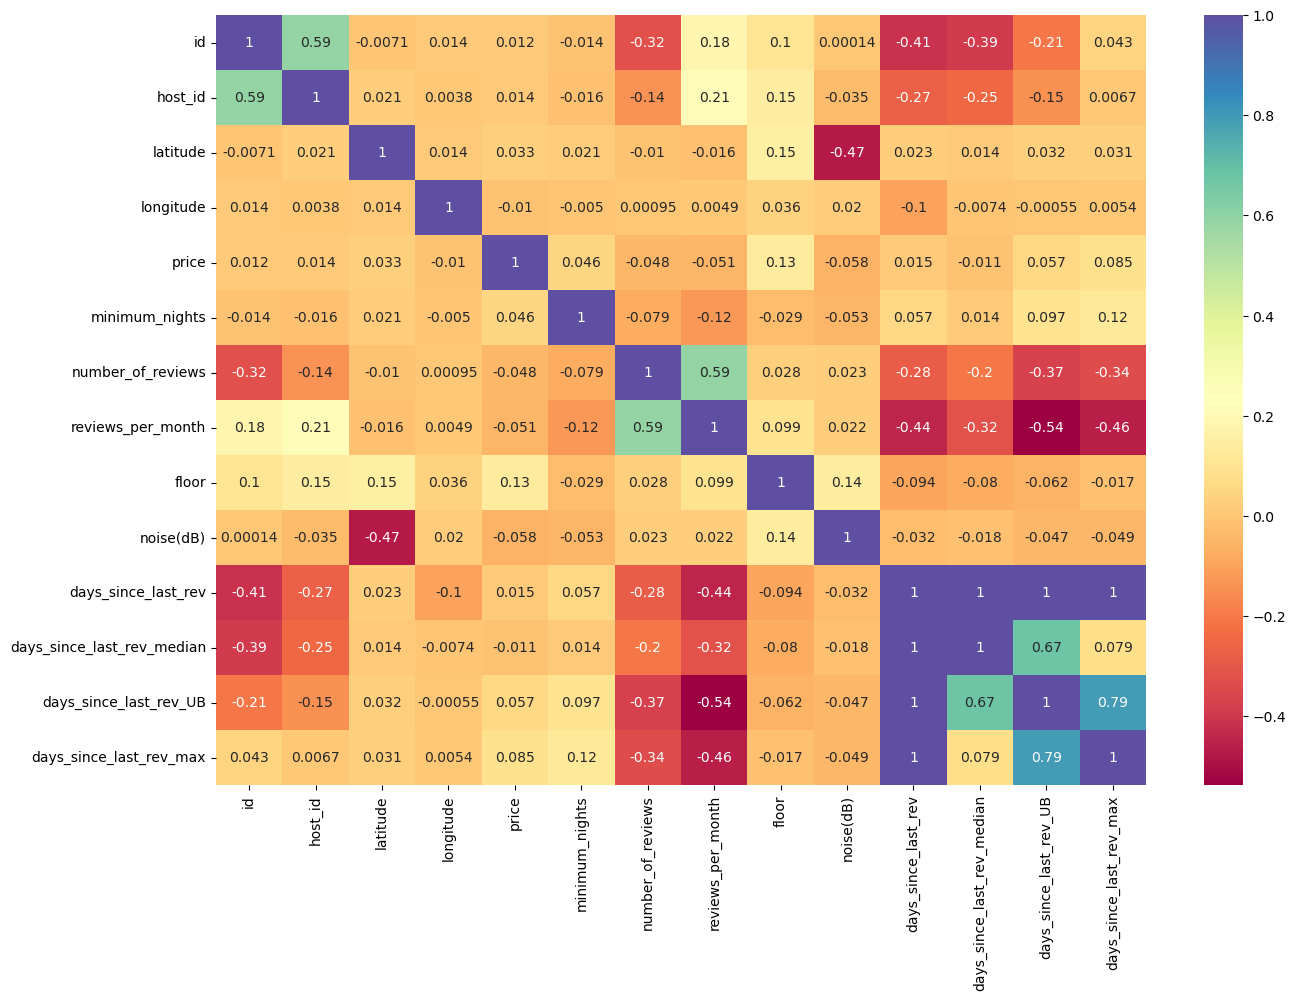

In [1746]:
import seaborn as sns

plt.figure(figsize = (15,10))
sns.heatmap(data=final.corr(), cmap = "Spectral", annot=True)

In [1747]:
# Not a lot of very strong correlations between the explanatory variables and the price

In [1748]:
null_counts = final.isnull().sum()
print("\nNull Counts in Each Column:")
print(null_counts)


Null Counts in Each Column:
id                               0
name                            14
host_id                          0
host_name                       16
neighbourhood_group              0
neighbourhood                    0
latitude                         0
longitude                        0
room_type                        0
price                            0
minimum_nights                   0
number_of_reviews                0
last_review                   7991
reviews_per_month                0
floor                            0
noise(dB)                        0
days_since_last_rev           7991
days_since_last_rev_median       0
days_since_last_rev_UB           0
days_since_last_rev_max          0
dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

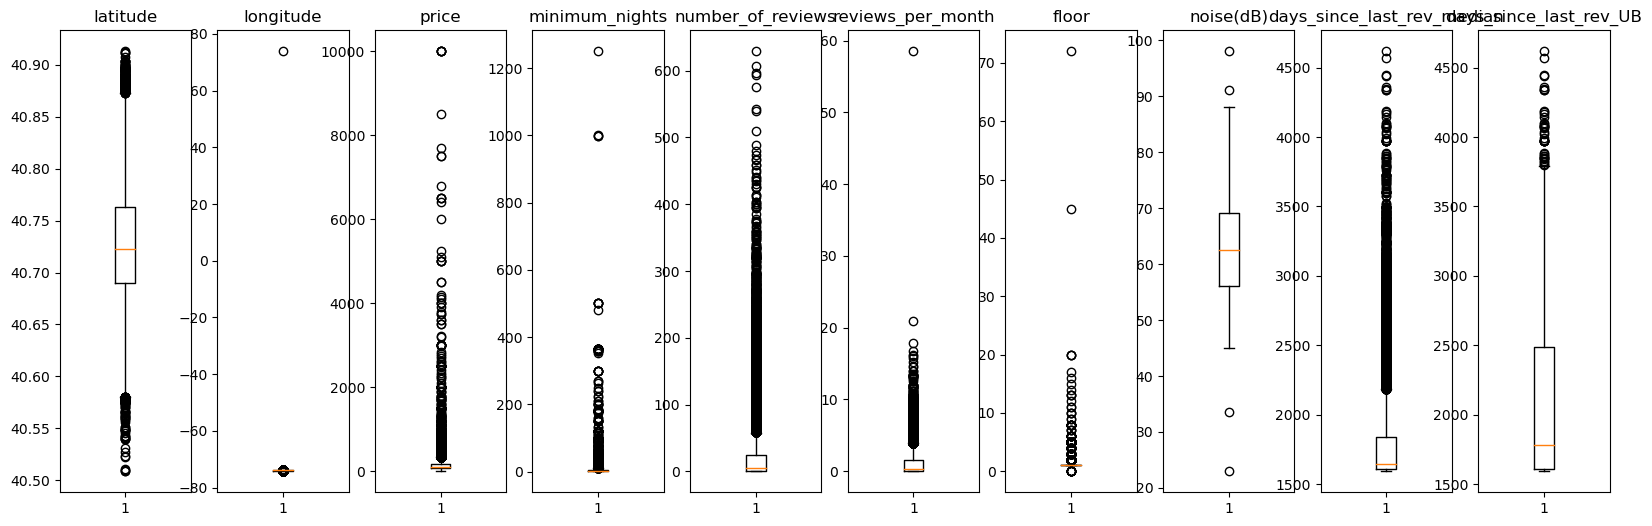

In [1749]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10) = plt.subplots(1, 10, figsize = (20,6))

ax1.boxplot(final["latitude"])
ax1.set_title("latitude")

ax2.boxplot(final["longitude"])
ax2.set_title("longitude")

ax3.boxplot(final["price"])
ax3.set_title("price")

ax4.boxplot(final["minimum_nights"])
ax4.set_title("minimum_nights")

ax5.boxplot(final["number_of_reviews"])
ax5.set_title("number_of_reviews")

ax6.boxplot(final["reviews_per_month"])
ax6.set_title("reviews_per_month")

ax7.boxplot(final["floor"])
ax7.set_title("floor")

ax8.boxplot(final["noise(dB)"])
ax8.set_title("noise(dB)")

ax9.boxplot(final["days_since_last_rev_median"])
ax9.set_title("days_since_last_rev_median")

ax10.boxplot(final["days_since_last_rev_UB"])
ax10.set_title("days_since_last_rev_UB")

plt.show

In [1750]:
# Lots of outliers for all of the numeric variables
from scipy import stats
from scipy.stats import zscore
from scipy.stats.mstats import winsorize

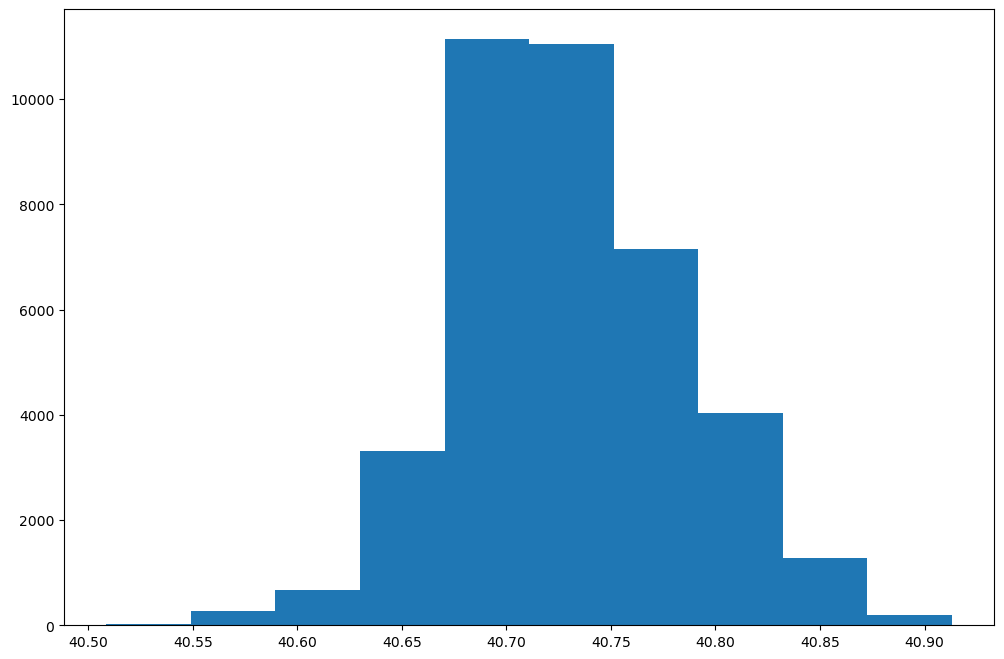

In [1751]:
final['latitude'].hist(bins=10, figsize=(12, 8), grid=False)  # Adjust figsize and bins as needed
plt.show()

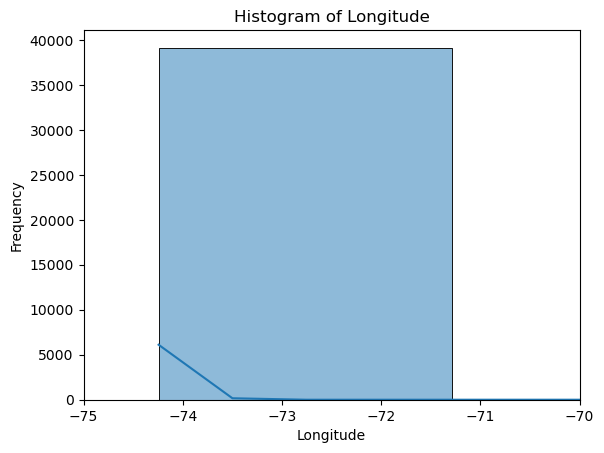

In [1752]:
sns.histplot(data=final, x='longitude', bins=50, kde=True)
plt.title('Histogram of Longitude')
plt.xlabel('Longitude')
plt.ylabel('Frequency')
plt.xlim(-75,-70)
plt.show()

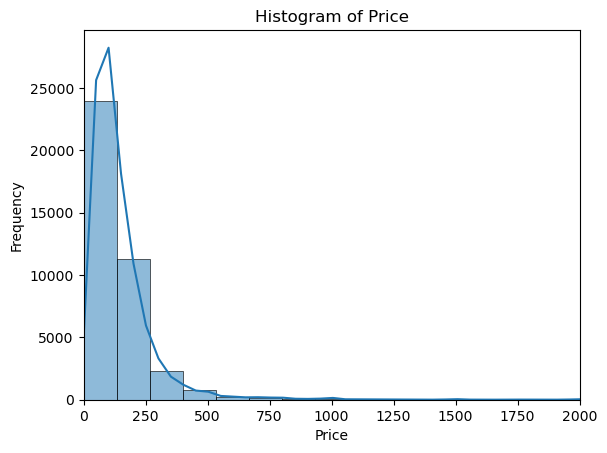

In [1753]:
sns.histplot(data=final, x='price', bins=75, kde=True)
plt.title('Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.xlim(0,2000)
plt.show()

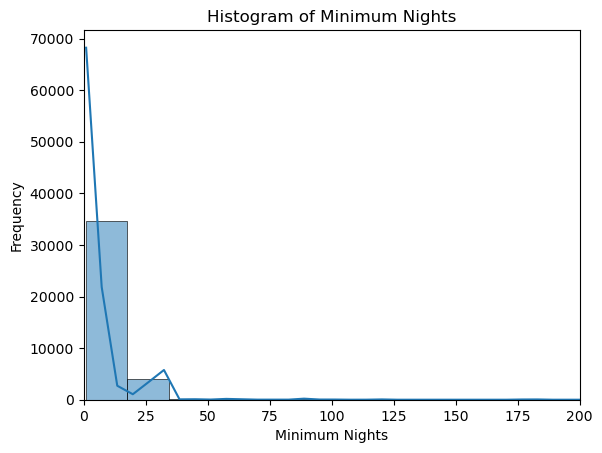

In [1754]:
sns.histplot(data=final, x='minimum_nights', bins=75, kde=True)
plt.title('Histogram of Minimum Nights')
plt.xlabel('Minimum Nights')
plt.ylabel('Frequency')
plt.xlim(0,200)
plt.show()

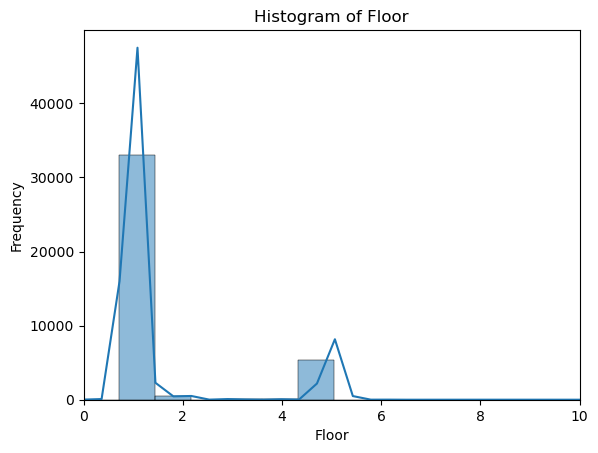

In [1755]:
sns.histplot(data=final, x='floor', bins=100, kde=True)
plt.title('Histogram of Floor')
plt.xlabel('Floor')
plt.ylabel('Frequency')
plt.xlim(0,10)
plt.show()

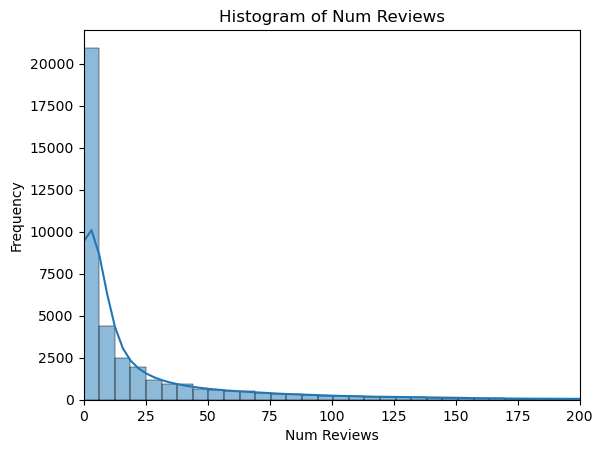

In [1756]:
sns.histplot(data=final, x='number_of_reviews', bins=100, kde=True)
plt.title('Histogram of Num Reviews')
plt.xlabel('Num Reviews')
plt.ylabel('Frequency')
plt.xlim(0,200)
plt.show()

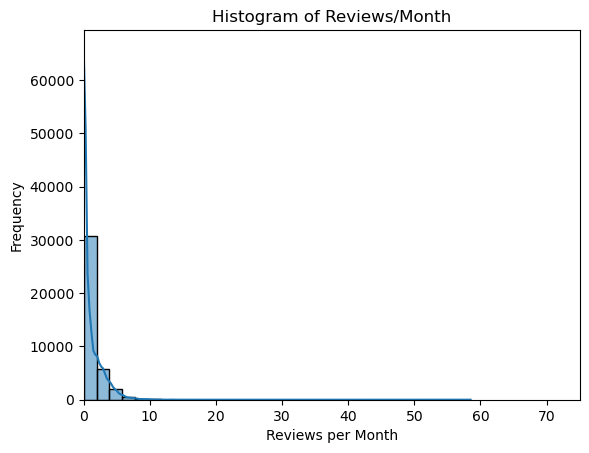

In [1757]:
sns.histplot(data=final, x='reviews_per_month', bins=30, kde=True)
plt.title('Histogram of Reviews/Month')
plt.xlabel('Reviews per Month')
plt.ylabel('Frequency')
plt.xlim(0,75)
plt.show()

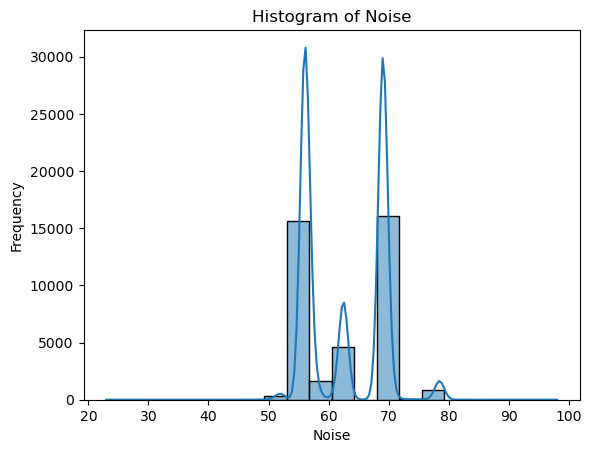

In [1758]:
sns.histplot(data=final, x='noise(dB)', bins=20, kde=True)
plt.title('Histogram of Noise')
plt.xlabel('Noise')
plt.ylabel('Frequency')
plt.show()

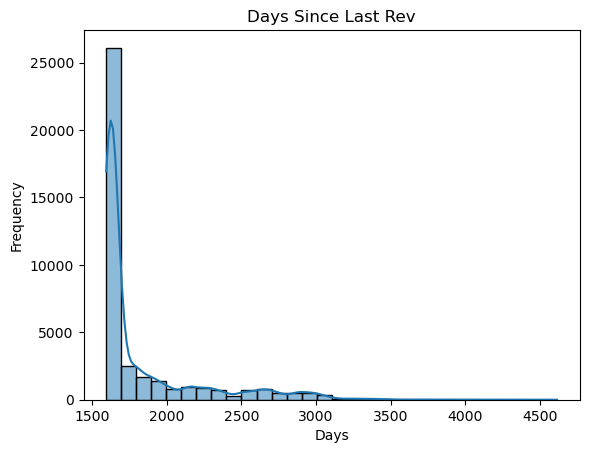

In [1759]:
sns.histplot(data=final, x='days_since_last_rev_median', bins=30, kde=True)
plt.title('Days Since Last Rev')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.show()

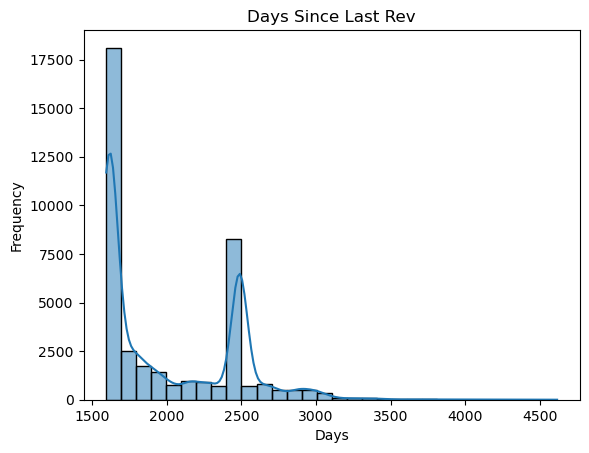

In [1760]:
sns.histplot(data=final, x='days_since_last_rev_UB', bins=30, kde=True)
plt.title('Days Since Last Rev')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.show()
# As we can see adding the upper bound to the null values of days_since_last_review has impacted the distribution. 
# It may be better to go with filling the NA values with the median

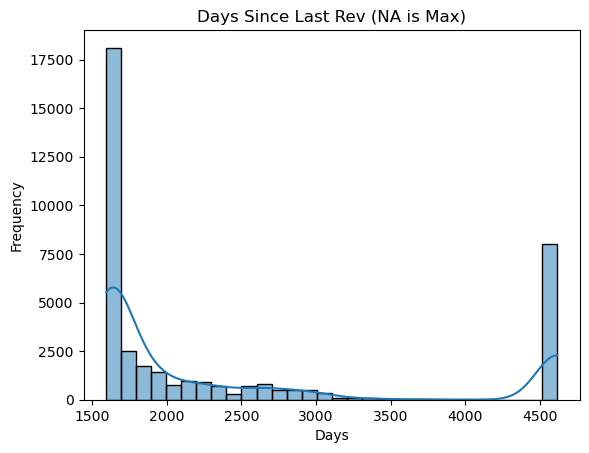

In [1761]:
sns.histplot(data=final, x='days_since_last_rev_max', bins=30, kde=True)
plt.title('Days Since Last Rev (NA is Max)')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.show()

In [1762]:
# From all the analysis above, we can see that none of the numeric variables are normally distributed or symmetric 
# besides 'latitude' are normal
import numpy as np
z_scores_latitude = zscore(final["latitude"])
print("Number of Outliers: {}".format(len(np.where(z_scores_latitude >3)[0])))

Number of Outliers: 43


In [1763]:
# Detecting outliers using IQR for non normal numerical variables

def iqr(df, var):
    q1 = np.quantile(df[var], 0.25)
    q3 = np.quantile(df[var], 0.75)
    diff = q3-q1
    lower_v = q1 - (1.5*diff)
    upper_v = q3 + (1.5*diff)
    return df[(df[var]<lower_v) | (df[var]>upper_v)]

price_out = iqr(final, "price")
print(price_out.shape)
print(final.shape)
print(price_out.min())
# A lot of the data has extreme prices. 2350/39131, or about 6% of the data to be exact. 
# Prices greater than $335 are considered outliers

(2350, 20)
(39131, 20)
id                                          15396
host_id                                      2335
host_name                                       A
neighbourhood_group                         Bronx
neighbourhood                            Allerton
latitude                                  40.5233
longitude                               -74.20295
room_type                         Entire home/apt
price                                       335.0
minimum_nights                                  1
number_of_reviews                               0
last_review                   2012-09-18 00:00:00
reviews_per_month                             0.0
floor                                           0
noise(dB)                                22.96436
days_since_last_rev                        1594.0
days_since_last_rev_median                 1594.0
days_since_last_rev_UB                     1594.0
days_since_last_rev_max                    1594.0
dtype: object


/var/folders/pd/wk9rt5m90_9ft6dx_wb32vx00000gn/T/ipykernel_88960/3657813156.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(price_out.min())


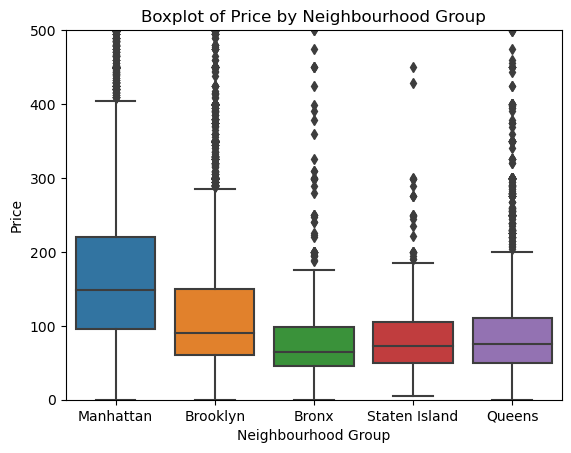

In [1764]:
sns.boxplot(x='neighbourhood_group', y='price', data=final)
plt.title('Boxplot of Price by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price')
plt.ylim(0,500)
plt.show()

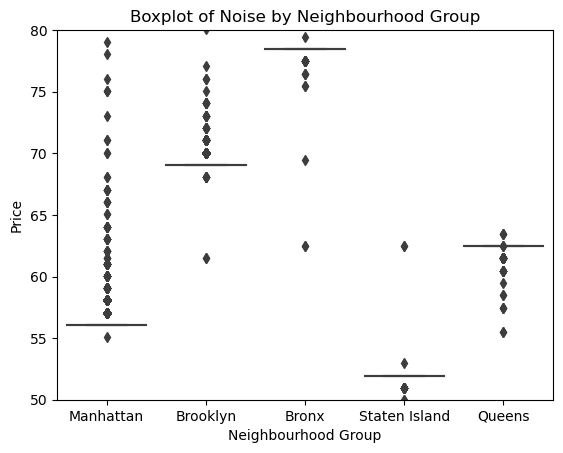

In [1765]:
sns.boxplot(x='neighbourhood_group', y='noise(dB)', data=final)
plt.title('Boxplot of Noise by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price')
plt.ylim(50,80)
plt.show()

In [1766]:
price_manhattan_out = iqr(final[final['neighbourhood_group']=='Manhattan'], "price")
print(price_manhattan_out.shape)
print(final[final['neighbourhood_group']=='Manhattan'].shape)
print(price_manhattan_out['price'].min())
print(price_manhattan_out['price'].max())

(1001, 20)
(17333, 20)
408.0
10000.0


In [1767]:
price_brooklyn_out = iqr(final[final['neighbourhood_group']=='Brooklyn'], "price")
print(price_brooklyn_out.shape)
print(final[final['neighbourhood_group']=='Brooklyn'].shape)
print(price_brooklyn_out['price'].min())
print(price_brooklyn_out['price'].max())
print(price_brooklyn_out[price_brooklyn_out['price']>4000])

(783, 20)
(16086, 20)
288.0
10000.0
             id                                             name    host_id  \
18657   2271504                 SUPER BOWL Brooklyn Duplex Apt!!   11598359   
18858   2952861                             Photography Location    1177497   
23410  13894339  Luxury 1 bedroom apt. -stunning Manhattan views    5143901   
26548  21238053                                       Broadway 1  153497815   
32530  34895693                             Gem of east Flatbush  262534951   
32578  34981637      bay ridge & sunset park furnished apartment  263564234   
32749  35345358                   Northside Williamsburg Stunner     956324   

      host_name neighbourhood_group       neighbourhood  latitude  longitude  \
18657  Jonathan            Brooklyn        Clinton Hill  40.68766  -73.96439   
18858   Jessica            Brooklyn        Clinton Hill  40.69127  -73.96563   
23410      Erin            Brooklyn          Greenpoint  40.73260  -73.95739   
26548   Sar

In [1768]:
price_bronx_out = iqr(final[final['neighbourhood_group']=='Bronx'], "price")
print(price_bronx_out.shape)
print(final[final['neighbourhood_group']=='Bronx'].shape)
print(price_bronx_out['price'].min())
print(price_bronx_out['price'].max())
print(price_bronx_out[price_bronx_out['price']>500])
# The row where price = $2500 is definitely an outlier

(50, 20)
(875, 20)
187.0
2500.0
             id                                        name    host_id  \
33515   6557289             1 Room in a 2 Bedroom Available    7074531   
33728  19698169                     "The luxury of Comfort"  131826530   
33749  20330081  New York's Hidden Secret for luxury living  131826530   
34038  30253236                        SedaOn2 Dance Studio  140862407   
34274  36177241                      VJ'S 5 HOUR YACHT TOUR   23732730   
34275  36199090    ROMANTIC SUNSET YACHT CRUISE & FIREWORKS   23732730   

      host_name neighbourhood_group       neighbourhood  latitude  longitude  \
33515  Jonathan               Bronx            Longwood  40.82639  -73.90363   
33728     Kathy               Bronx           Riverdale  40.88671  -73.91510   
33749     Kathy               Bronx           Riverdale  40.88515  -73.91411   
34038   Angelie               Bronx  Westchester Square  40.84378  -73.84469   
34274     Buddy               Bronx         City 

In [1769]:
price_staten_out = iqr(final[final['neighbourhood_group']=='Staten Island'], "price")
print(price_staten_out.shape)
print(final[final['neighbourhood_group']=='Staten Island'].shape)
print(price_staten_out['price'].min())
print(price_staten_out['price'].max())
print(price_staten_out[price_staten_out['price']>500])
# The entry with price 5000 seems to be an outlier

(31, 20)
(301, 20)
190.0
5000.0
             id                                               name    host_id  \
34309    738588        Wedding guests accommodations, 3-7 bedrooms    1360198   
34326   4623622        Victorian with Stunning Views of NYC Harbor   22506665   
34397  18051877                            Victorian Film location    2675644   
34424  20305160    Beach House Retreat. 15 minutes from Manhattan.    1715301   
34569  34835762  Central Hall Colonial with Free Parking Bus EX...  252051657   
34593  36487249       Huge room with large windows and a queen bed       2335   

        host_name neighbourhood_group   neighbourhood  latitude  longitude  \
34309      Marina       Staten Island        Arrochar  40.59193  -74.06476   
34326     William       Staten Island      St. George  40.64571  -74.07835   
34397      Alissa       Staten Island   Randall Manor  40.63952  -74.09730   
34424        Mark       Staten Island  Fort Wadsworth  40.59546  -74.06092   
34569  Ana

In [1770]:
price_queens_out = iqr(final[final['neighbourhood_group']=='Queens'], "price")
print(price_queens_out.shape)
print(final[final['neighbourhood_group']=='Queens'].shape)
print(price_queens_out['price'].min())
print(price_queens_out['price'].max())
print(price_queens_out[price_queens_out['price']>1000])
# The row with price 10000 is definitely an outlier

(266, 20)
(4536, 20)
204.0
10000.0
             id                                              name   host_id  \
35145   7003697               Furnished room in Astoria apartment  20582832   
35478  11234747            Mins away to Manhattan Suite Residence  24146326   
35729  13963005                      Gorgeous 2 Bedroom apartment  41870118   
36269  18935359  Magnificent Lakeview Home on Kissena Park in NYC  23234988   
36325  19261720        Oceanfront vacation home on Rockaway Beach   6988611   
36948  23169146                           Artist apartment in LIC  51260506   
38365  33133321                     Majestic Mansion LifeStyle :)  74373729   
38566  34221161                Room with sofa bed or air mattress   9295237   
38918  35706068                                  wait until later  35741633   

      host_name neighbourhood_group     neighbourhood  latitude  longitude  \
35145  Kathrine              Queens           Astoria  40.76810  -73.91651   
35478    Julien   

In [1771]:
# Drop the following ids. 7003697, 18051877, 19698169. The outliers
ids_to_drop = [7003697, 18051877, 19698169]
final_no_outliers = final[~final['id'].isin(ids_to_drop)]
print(final.shape)
print(final_no_outliers.shape)

(39131, 20)
(39128, 20)


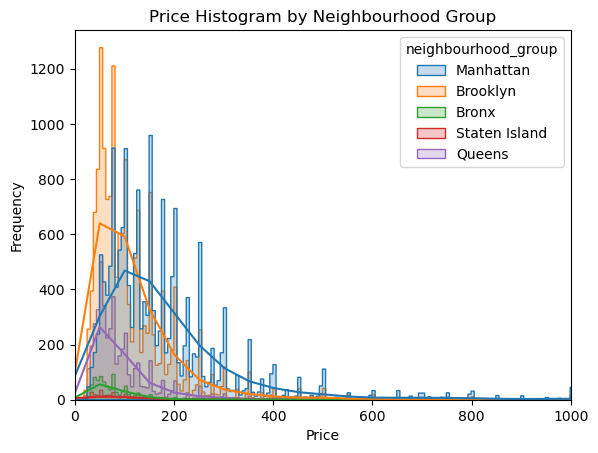

In [1772]:
sns.histplot(data=final_no_outliers, x='price', hue='neighbourhood_group', element='step', kde=True, common_norm=False)
plt.title('Price Histogram by Neighbourhood Group')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.xlim(0,1000)
plt.show()

In [1773]:
minimum_nights_out = iqr(final_no_outliers, "minimum_nights")
print(minimum_nights_out.shape)
print(final.shape)
print(minimum_nights_out['minimum_nights'].min())
print(minimum_nights_out['minimum_nights'].max())
# Minimum nights greater than 13 are considered outliers
# 13.3% of the data is outliers when considering minimum nights.
print(minimum_nights_out[minimum_nights_out['minimum_nights']>500])

ids_to_drop2 = [1615764, 4204302, 30378211, 20990053]
final_no_outliers = final_no_outliers[~final_no_outliers['id'].isin(ids_to_drop2)]
print(final_no_outliers.shape)

(5237, 20)
(39131, 20)
12
1250
             id                              name    host_id  host_name  \
1056    1615764                               NaN    6676776      Peter   
2143    4204302  Prime W. Village location 1 bdrm   17550546  Genevieve   
13554  30378211      Shared Studio (females only)  200401254        Meg   
26421  20990053   Beautiful place in Brooklyn! #2  151084261      Angie   

      neighbourhood_group      neighbourhood  latitude  longitude  \
1056            Manhattan  Battery Park City  40.71239  -74.01620   
2143            Manhattan  Greenwich Village  40.73293  -73.99782   
13554           Manhattan  Greenwich Village  40.73094  -73.99900   
26421            Brooklyn       Williamsburg  40.71772  -73.95059   

             room_type  price  minimum_nights  number_of_reviews last_review  \
1056   Entire home/apt  400.0            1000                  0         NaT   
2143   Entire home/apt  180.0            1250                  2  2014-11-09   
13554  

In [1774]:
test_data.head(50)
unique_room_types = test_data['room_type'].unique()
print(unique_room_types)

['Private room' 'Entire home/apt' 'Shared room']


In [1775]:
# I know that there are some extreme outliers in 'minimum_nights'
floor_out = iqr(final, "floor")
print(floor_out.shape)
print(floor_out['floor'].min())
print(floor_out['floor'].max())
print(floor_out[floor_out['floor']>20])
#6072/39131 are considered outliers. That is over 15% of the data. But 0-72 are all valid floor numbers
# Although I doubt there is an airbnb on the 72nd floor.
# these are the two floor outliers, one where floor = 72 and the other where floor = 45
# We will drop these: 36487247, 36487255

ids_to_drop3 = [36487247, 36487255]
final_no_outliers = final_no_outliers[~final_no_outliers['id'].isin(ids_to_drop3)]
print(final_no_outliers.shape)

(6072, 20)
0
72
             id                                               name   host_id  \
17330  36487247         Spacious 3BHK in the empire state building   2153455   
17332  36487255  Best location with NYC, spacious room with gre...  96595601   

      host_name neighbourhood_group neighbourhood  latitude  longitude  \
17330    Rachel           Manhattan       Midtown   40.7484   -73.9857   
17332   Tristan           Manhattan       Tribeca   40.7163   -74.0086   

              room_type   price  minimum_nights  number_of_reviews  \
17330  Entire home/apt   1473.0               9                  0   
17332      Private room    17.0              11                  0   

      last_review  reviews_per_month  floor  noise(dB)  days_since_last_rev  \
17330         NaT                0.0     72  61.478632                  NaN   
17332         NaT                0.0     45  61.478632                  NaN   

       days_since_last_rev_median  days_since_last_rev_UB  \
17330     

In [1776]:
finall = final_no_outliers[['neighbourhood', 'neighbourhood_group','price']]
print(finall)

         neighbourhood neighbourhood_group  price
0              Midtown           Manhattan  225.0
1               Harlem           Manhattan  150.0
2          East Harlem           Manhattan   80.0
3          Murray Hill           Manhattan  200.0
4      Upper West Side           Manhattan   79.0
...                ...                 ...    ...
39126         Elmhurst              Queens   45.0
39127          Jamaica              Queens   65.0
39128     Far Rockaway              Queens  635.0
39129     Far Rockaway              Queens  635.0
39130        Ridgewood              Queens    0.0

[39122 rows x 3 columns]


In [1777]:
num_rev_out = iqr(final, "number_of_reviews")
print(num_rev_out.shape)
print(num_rev_out['number_of_reviews'].min())
print(num_rev_out['number_of_reviews'].max())
#4879/39131 of the data, about 12.4% of the number of reviews are outliers. But they could just be really popular airbnbs.
print(num_rev_out[num_rev_out['number_of_reviews']>500])

(4879, 20)
59
629
             id                                               name   host_id  \
708      834190           Manhattan Lux Loft.Like.Love.Lots.Look !   2369681   
753      891117                       Private Bedroom in Manhattan   4734398   
760      903947                     Beautiful Bedroom in Manhattan   4734398   
761      903972                         Great Bedroom in Manhattan   4734398   
35245   8168619                  Steps away from Laguardia airport  37312959   
35328   9145202                            Room near JFK Queen Bed  47621202   
35414  10101135                            Room Near JFK Twin Beds  47621202   
36005  16276632  Cozy Room Family Home LGA Airport NO CLEANING FEE  26432133   

      host_name neighbourhood_group    neighbourhood  latitude  longitude  \
708       Carol           Manhattan  Lower East Side  40.71921  -73.99116   
753          Jj           Manhattan           Harlem  40.82264  -73.94041   
760          Jj           Manh

In [1778]:
rev_month_out = iqr(final, "reviews_per_month")
print(rev_month_out.shape)
print(rev_month_out['reviews_per_month'].min())
print(rev_month_out['reviews_per_month'].max())
#About 6.5% of the reviews per month data is outliers. Monthly reviews above 3.95 are considered outliers.

(2555, 20)
3.95
58.5


In [1779]:
noise_out = iqr(final, "noise(dB)")
print(noise_out.shape)
print(noise_out.min())
print(noise_out.max())
#4/39131 of the noise observations are considered outliers. 

(4, 20)
id                                                        7003697
name                          Furnished room in Astoria apartment
host_id                                                   2675644
host_name                                                  Alissa
neighbourhood_group                                      Brooklyn
neighbourhood                                             Astoria
latitude                                                 40.63952
longitude                                                -74.0973
room_type                                         Entire home/apt
price                                                      5000.0
minimum_nights                                                  1
number_of_reviews                                               0
last_review                                   2016-02-13 00:00:00
reviews_per_month                                             0.0
floor                                                           0
no

minimum_nights_out = iqr(final, "minimum_nights")
print(minimum_nights_out.shape)
print(final.shape)

In [1780]:
days_med_out = iqr(final, "days_since_last_rev_median")
print(days_med_out.shape)
print(days_med_out['days_since_last_rev_median'].min())
print(days_med_out['days_since_last_rev_median'].max())

(5732, 20)
2183.0
4617.0


In [1781]:
days_UB_out = iqr(final, "days_since_last_rev_UB")
print(days_UB_out.shape)
print(days_UB_out.min())
print(days_UB_out.max())

(41, 20)
id                                                        7801
name                          2 BD / 2BA WITH GARDEN, SLEEPS 6
host_id                                                  21207
host_name                                              Allison
neighbourhood_group                                   Brooklyn
neighbourhood                                          Astoria
latitude                                              40.62908
longitude                                            -74.00879
room_type                                      Entire home/apt
price                                                     55.0
minimum_nights                                               1
number_of_reviews                                            1
last_review                                2011-03-28 00:00:00
reviews_per_month                                         0.01
floor                                                        1
noise(dB)                                     

In [1782]:
final_no_outliers[["latitude", "longitude", "price", "minimum_nights", "number_of_reviews", "reviews_per_month", "floor", "noise(dB)", 
   "days_since_last_rev_median", "days_since_last_rev_UB", "days_since_last_rev_max"]].agg(["skew"]).transpose()
# Everything except latitude, noise(dB), days_since_last_rev_UB is skewed heavily.
# -0.5 through 0.5 is symmetric
# -0.5 through -1.0 and 0.5 through 1.0 is moderately skewed
# If less than -1.0 and greater than 1.0 are very skewed

,skew
latitude,0.237227
longitude,196.665740
price,18.663094
minimum_nights,12.942188
number_of_reviews,3.692839
reviews_per_month,3.430338
floor,2.289140
noise(dB),0.238613
days_since_last_rev_median,2.181598
days_since_last_rev_UB,0.833060


In [1783]:
final_no_outliers["positive_long"] = np.abs(final_no_outliers["longitude"])
final_no_outliers["long_log"] = np.log1p(final_no_outliers["positive_long"])
final_no_outliers["long_sqrt"] = np.sqrt(final_no_outliers["positive_long"])
final_no_outliers[["longitude", "positive_long", "long_log", "long_sqrt"]].agg(["skew"]).transpose()

,skew
longitude,196.665740
positive_long,-1.300182
long_log,-1.305128
long_sqrt,-1.302689


In [1784]:
final_no_outliers["price_log"] = np.log1p(final_no_outliers["price"])
final_no_outliers["price_sqrt"] = np.sqrt(final_no_outliers["price"])
final_no_outliers[["price", "price_log", "price_sqrt"]].agg(["skew"]).transpose()

,skew
price,18.663094
price_log,0.534657
price_sqrt,3.976445


In [1785]:
from scipy.stats import boxcox

final_no_outliers["min_nights_log"] = np.log1p(final_no_outliers["minimum_nights"])
final_no_outliers["min_nights_sqrt"] = np.sqrt(final_no_outliers["minimum_nights"])

final_no_outliers["min_nights_boxcox"], lambda_value = boxcox(final_no_outliers["minimum_nights"])
print(final_no_outliers[["minimum_nights", "min_nights_boxcox"]].agg(["skew"]).transpose())
test_data["min_nights_boxcox"], lambda_value = boxcox(test_data["minimum_nights"])

                        skew
minimum_nights     12.942188
min_nights_boxcox   0.161149


In [1786]:
final_no_outliers["num_revs_log"] = np.log1p(final_no_outliers["number_of_reviews"])
final_no_outliers["num_revs_sqrt"] = np.sqrt(final_no_outliers["number_of_reviews"])
final_no_outliers[["number_of_reviews", "num_revs_log", "num_revs_sqrt"]].agg(["skew"]).transpose()
test_data["num_revs_log"] = np.log1p(test_data["number_of_reviews"])

In [1787]:
from scipy.stats import yeojohnson

final_no_outliers["revs_month_log"] = np.log1p(final_no_outliers["reviews_per_month"])
final_no_outliers["revs_month_sqrt"] = np.sqrt(final_no_outliers["reviews_per_month"])
final_no_outliers[["reviews_per_month", "revs_month_log", "revs_month_sqrt"]].agg(["skew"]).transpose()

final_no_outliers["revs_month_yeojohnson"], lambda_value = yeojohnson(final_no_outliers["reviews_per_month"])
test_data["revs_month_yeojohnson"], lambda_value = yeojohnson(test_data["reviews_per_month"])
print(final_no_outliers[["reviews_per_month", "revs_month_yeojohnson"]].agg(["skew"]).transpose())

                           skew
reviews_per_month      3.430338
revs_month_yeojohnson  0.314844


In [1788]:
final_no_outliers["floor_log"] = np.log1p(final_no_outliers["floor"])
final_no_outliers["floor_sqrt"] = np.sqrt(final_no_outliers["floor"])
final_no_outliers["floor_yeo"], lambda_value = yeojohnson(final_no_outliers["floor"])
final_no_outliers[["floor", "floor_log", "floor_sqrt", "floor_yeo"]].agg(["skew"]).transpose()

,skew
floor,2.289140
floor_log,2.025418
floor_sqrt,2.059585
floor_yeo,-2.033576


In [1789]:
quartiles = final_no_outliers['floor'].quantile([0.25, 0.5, 0.75])
print("Q1 (25th percentile):", quartiles[0.25])
print("Q2 (50th percentile, Median):", quartiles[0.5])
print("Q3 (75th percentile):", quartiles[0.75])

Q1 (25th percentile): 1.0
Q2 (50th percentile, Median): 1.0
Q3 (75th percentile): 1.0


In [1790]:
count_equal_to_0 = len(final_no_outliers[final_no_outliers['floor'] == 0])
count_equal_to_1 = len(final_no_outliers[final_no_outliers['floor'] == 1])
count_greater_than_1 = len(final_no_outliers[final_no_outliers['floor'] > 1])

print("Count of floor equal to 0:", count_equal_to_0)
print("Count of floor equal to 1:", count_equal_to_1)
print("Count of floor > 1:", count_greater_than_1)

Count of floor equal to 0: 9
Count of floor equal to 1: 33055
Count of floor > 1: 6058


In [1791]:
correlation = final_no_outliers[['price', 'floor']].corr()
print(correlation)
# Because there is not a meaningful relationship between 'price' and 'floor', and because the distribution of floor 
# is so heavily skewed, it might be better to treat floor as a categorical variable. 

          price     floor
price  1.000000  0.134681
floor  0.134681  1.000000


In [1792]:
final_no_outliers["days_med_log"] = np.log1p(final_no_outliers["days_since_last_rev_median"])
final_no_outliers["days_med_sqrt"] = np.sqrt(final_no_outliers["days_since_last_rev_median"])
test_data["days_med_log"] = np.log1p(test_data["days_since_last_rev_median"])
final_no_outliers[["days_since_last_rev_median", "days_med_log", "days_med_sqrt"]].agg(["skew"]).transpose()

,skew
days_since_last_rev_median,2.181598
days_med_log,1.845226
days_med_sqrt,1.998106


In [1793]:
final_no_outliers["days_UB_log"] = np.log1p(final_no_outliers["days_since_last_rev_UB"])
final_no_outliers["days_UB_sqrt"] = np.sqrt(final_no_outliers["days_since_last_rev_UB"])
test_data["days_UB_log"] = np.log1p(test_data["days_since_last_rev_UB"])
final_no_outliers[["days_since_last_rev_UB", "days_UB_log", "days_UB_sqrt"]].agg(["skew"]).transpose()

,skew
days_since_last_rev_UB,0.833060
days_UB_log,0.599636
days_UB_sqrt,0.701683


In [1794]:
final_no_outliers["days_max_log"] = np.log1p(final_no_outliers["days_since_last_rev_max"])
final_no_outliers["days_max_sqrt"] = np.sqrt(final_no_outliers["days_since_last_rev_max"])
test_data["days_max_log"] = np.log1p(test_data["days_since_last_rev_max"])
final_no_outliers[["days_since_last_rev_max", "days_max_log", "days_max_sqrt"]].agg(["skew"]).transpose()
# price_log, min_nights_boxcox, num_revs_log, revs_month_yeojohnson

,skew
days_since_last_rev_max,1.173427
days_max_log,0.982102
days_max_sqrt,1.083533


In [1795]:
final_no_outliers.shape

(39122, 42)

In [1796]:
final_no_outliers.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'floor', 'noise(dB)', 'days_since_last_rev',
       'days_since_last_rev_median', 'days_since_last_rev_UB',
       'days_since_last_rev_max', 'positive_long', 'long_log', 'long_sqrt',
       'price_log', 'price_sqrt', 'min_nights_log', 'min_nights_sqrt',
       'min_nights_boxcox', 'num_revs_log', 'num_revs_sqrt', 'revs_month_log',
       'revs_month_sqrt', 'revs_month_yeojohnson', 'floor_log', 'floor_sqrt',
       'floor_yeo', 'days_med_log', 'days_med_sqrt', 'days_UB_log',
       'days_UB_sqrt', 'days_max_log', 'days_max_sqrt'],
      dtype='object')

In [1797]:
# latitude, price_log, min_nights_boxcox, num_revs_log, revs_month_yeojohnson, are the noiseDB transformed variables 
# that are symmetric
# longitude can be dropped it seems, floor may need to be split into categorical variables
# figure out how to use days since last rev median.
# then make floor, neighborhood_group, room type as categorical variables 
null_last_review_rows = final_no_outliers[final_no_outliers['days_since_last_rev'].isnull()]
print(null_last_review_rows[['number_of_reviews', 'reviews_per_month']])
all_zero_reviews = null_last_review_rows[['number_of_reviews', 'reviews_per_month']].eq(0).all(axis=1).all()
print(f"Are all 'number_of_reviews' and 'reviews_per_month' 0 for rows where 'days_since_last_review' is null? {all_zero_reviews}")

       number_of_reviews  reviews_per_month
1                      0                0.0
10                     0                0.0
11                     0                0.0
73                     0                0.0
78                     0                0.0
...                  ...                ...
39126                  0                0.0
39127                  0                0.0
39128                  0                0.0
39129                  0                0.0
39130                  0                0.0

[7985 rows x 2 columns]
Are all 'number_of_reviews' and 'reviews_per_month' 0 for rows where 'days_since_last_review' is null? True


In [1798]:
final.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,floor,noise(dB),days_since_last_rev,days_since_last_rev_median,days_since_last_rev_UB,days_since_last_rev_max
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,2019-05-21,0.38,1,56.054278,1641.0,1641.0,1641.0,1641.0
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,NaT,0.00,1,56.054278,NaN,1643.0,2485.5,4617.0
2,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,2018-11-19,0.10,1,56.054278,1824.0,1824.0,1824.0,1824.0
3,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200.0,3,74,2019-06-22,0.59,1,56.054278,1609.0,1609.0,1609.0,1609.0
4,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79.0,2,118,2017-07-21,0.99,1,56.054278,2310.0,2310.0,2310.0,2310.0


In [1799]:
final_no_outliers.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'floor', 'noise(dB)', 'days_since_last_rev',
       'days_since_last_rev_median', 'days_since_last_rev_UB',
       'days_since_last_rev_max', 'positive_long', 'long_log', 'long_sqrt',
       'price_log', 'price_sqrt', 'min_nights_log', 'min_nights_sqrt',
       'min_nights_boxcox', 'num_revs_log', 'num_revs_sqrt', 'revs_month_log',
       'revs_month_sqrt', 'revs_month_yeojohnson', 'floor_log', 'floor_sqrt',
       'floor_yeo', 'days_med_log', 'days_med_sqrt', 'days_UB_log',
       'days_UB_sqrt', 'days_max_log', 'days_max_sqrt'],
      dtype='object')

In [1800]:
test_data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month', 'floor',
       'noise(dB)', 'Location', 'days_since_last_rev',
       'days_since_last_rev_median', 'days_since_last_rev_UB',
       'days_since_last_rev_max', 'min_nights_boxcox', 'num_revs_log',
       'revs_month_yeojohnson', 'days_med_log', 'days_UB_log', 'days_max_log'],
      dtype='object')

In [1801]:
final_no_outliers.drop(['name', "host_id", "host_name", 'price', 'price_sqrt', 'min_nights_log', 'min_nights_sqrt',
                       'minimum_nights', 'number_of_reviews', 'num_revs_sqrt', 'last_review', 
                       'reviews_per_month', 'revs_month_sqrt', 'revs_month_log', 'days_since_last_rev', 'days_since_last_rev_UB',
                       'days_since_last_rev_max', 'positive_long', 'long_log', 'long_sqrt', 'floor_log', 'floor_sqrt',
                       'floor_yeo', 'days_med_sqrt', 'days_UB_log','days_UB_sqrt'], axis=1, inplace=True)

print(final_no_outliers.columns)
print(final.columns)


# price_log, min_nights_boxcox, num_revs_log, revs_month_yeojohnson
#latitude, price_log, min_nights_boxcox, num_revs_log, revs_month_yeojohnson, are the noiseDB transformed variables 
# that are symmetric

Index(['id', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'floor', 'noise(dB)', 'days_since_last_rev_median',
       'price_log', 'min_nights_boxcox', 'num_revs_log',
       'revs_month_yeojohnson', 'days_med_log', 'days_max_log',
       'days_max_sqrt'],
      dtype='object')
Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'floor', 'noise(dB)', 'days_since_last_rev',
       'days_since_last_rev_median', 'days_since_last_rev_UB',
       'days_since_last_rev_max'],
      dtype='object')


In [1802]:
final_no_outliers.drop(['days_max_log', 'days_max_sqrt'], axis=1, inplace=True)

In [1803]:
final_no_outliers.columns

Index(['id', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'floor', 'noise(dB)', 'days_since_last_rev_median',
       'price_log', 'min_nights_boxcox', 'num_revs_log',
       'revs_month_yeojohnson', 'days_med_log'],
      dtype='object')

In [1804]:
test_data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month', 'floor',
       'noise(dB)', 'Location', 'days_since_last_rev',
       'days_since_last_rev_median', 'days_since_last_rev_UB',
       'days_since_last_rev_max', 'min_nights_boxcox', 'num_revs_log',
       'revs_month_yeojohnson', 'days_med_log', 'days_UB_log', 'days_max_log'],
      dtype='object')

In [1805]:
test_data.drop(['name', "host_id", "host_name", 'number_of_reviews', 'days_since_last_rev', 'days_UB_log', 'days_max_log'], axis=1, inplace=True)

print(test_data.columns)


Index(['id', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'minimum_nights', 'last_review', 'reviews_per_month',
       'floor', 'noise(dB)', 'Location', 'days_since_last_rev_median',
       'days_since_last_rev_UB', 'days_since_last_rev_max',
       'min_nights_boxcox', 'num_revs_log', 'revs_month_yeojohnson',
       'days_med_log'],
      dtype='object')


In [1806]:
test_data.drop(['minimum_nights', 'last_review', 'reviews_per_month', 'Location', 'days_since_last_rev_UB', 'days_since_last_rev_max',], axis=1, inplace=True)
print(test_data.columns)

Index(['id', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'floor', 'noise(dB)', 'days_since_last_rev_median',
       'min_nights_boxcox', 'num_revs_log', 'revs_month_yeojohnson',
       'days_med_log'],
      dtype='object')


In [1807]:
final_no_outliers.head()

,id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,floor,noise(dB),days_since_last_rev_median,price_log,min_nights_boxcox,num_revs_log,revs_month_yeojohnson,days_med_log
0,2595,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,1,56.054278,1641.0,5.420535,0.000000,3.828641,0.272855,7.403670
1,3647,Manhattan,Harlem,40.80902,-73.94190,Private room,1,56.054278,1643.0,5.017280,0.861208,0.000000,-0.000000,7.404888
2,5022,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,1,56.054278,1824.0,4.394449,1.416369,2.302585,0.090653,7.509335
3,5099,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,1,56.054278,1609.0,5.303305,0.861208,4.317488,0.366337,7.383989
4,5203,Manhattan,Upper West Side,40.80178,-73.96723,Private room,1,56.054278,2310.0,4.382027,0.592964,4.779123,0.488484,7.745436


In [1808]:
final.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,floor,noise(dB),days_since_last_rev,days_since_last_rev_median,days_since_last_rev_UB,days_since_last_rev_max
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,2019-05-21,0.38,1,56.054278,1641.0,1641.0,1641.0,1641.0
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,NaT,0.00,1,56.054278,NaN,1643.0,2485.5,4617.0
2,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,2018-11-19,0.10,1,56.054278,1824.0,1824.0,1824.0,1824.0
3,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200.0,3,74,2019-06-22,0.59,1,56.054278,1609.0,1609.0,1609.0,1609.0
4,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79.0,2,118,2017-07-21,0.99,1,56.054278,2310.0,2310.0,2310.0,2310.0


In [1809]:
unique_room_types = final_no_outliers['room_type'].unique()
print(unique_room_types)

['Entire home/apt' 'Private room' 'Shared room' 'Shared room '
 'Entire home/apt ']


In [1810]:
final_no_outliers['room_type'] = final_no_outliers['room_type'].replace({'Entire home/apt ': 'Entire home/apt'})
unique_room_types = final_no_outliers['room_type'].unique()
print(unique_room_types)

['Entire home/apt' 'Private room' 'Shared room' 'Shared room ']


In [1811]:
final_no_outliers['room_type'] = final_no_outliers['room_type'].replace({'Shared room ': 'Shared room'})
unique_room_types = final_no_outliers['room_type'].unique()
print(unique_room_types)

['Entire home/apt' 'Private room' 'Shared room']


In [1812]:
unique_room_types = test_data['room_type'].unique()
print(unique_room_types)

['Private room' 'Entire home/apt' 'Shared room']


In [1813]:
final_copy = final_no_outliers.copy()

import numpy as np

conditions = [
    (final_copy['floor'] == 0),
    (final_copy['floor'] == 1),
    (final_copy['floor'] > 1)
]

conditions2 = [
    (test_data['floor'] == 0),
    (test_data['floor'] == 1),
    (test_data['floor'] > 1)
]

choices = ['0', '1', '>1']

final_copy['floor_cat'] = np.select(conditions, choices, default=None)
test_data['floor_cat'] = np.select(conditions2, choices, default=None)
print(final_copy[['floor', 'floor_cat']].head())

   floor floor_cat
0      1         1
1      1         1
2      1         1
3      1         1
4      1         1


In [1814]:
final_copy.head()

,id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,floor,noise(dB),days_since_last_rev_median,price_log,min_nights_boxcox,num_revs_log,revs_month_yeojohnson,days_med_log,floor_cat
0,2595,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,1,56.054278,1641.0,5.420535,0.000000,3.828641,0.272855,7.403670,1
1,3647,Manhattan,Harlem,40.80902,-73.94190,Private room,1,56.054278,1643.0,5.017280,0.861208,0.000000,-0.000000,7.404888,1
2,5022,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,1,56.054278,1824.0,4.394449,1.416369,2.302585,0.090653,7.509335,1
3,5099,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,1,56.054278,1609.0,5.303305,0.861208,4.317488,0.366337,7.383989,1
4,5203,Manhattan,Upper West Side,40.80178,-73.96723,Private room,1,56.054278,2310.0,4.382027,0.592964,4.779123,0.488484,7.745436,1


In [1815]:
test_data.head()

,id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,floor,noise(dB),days_since_last_rev_median,min_nights_boxcox,num_revs_log,revs_month_yeojohnson,days_med_log,floor_cat
0,5178,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,1,56.054278,1607.0,0.594246,6.066108,0.734004,7.382746,1
1,5803,Brooklyn,South Slope,40.66829,-73.98779,Private room,1,69.056465,1607.0,1.027390,5.123964,0.552257,7.382746,1
2,6021,Manhattan,Upper West Side,40.79826,-73.96113,Private room,1,56.054278,1596.0,0.594246,4.736198,0.462953,7.375882,1
3,8490,Brooklyn,Bedford-Stuyvesant,40.68371,-73.94028,Entire home/apt,1,69.056465,1612.0,0.594246,4.488636,0.411634,7.385851,1
4,8505,Brooklyn,Windsor Terrace,40.65599,-73.97519,Private room,1,69.056465,1608.0,0.000000,2.995732,0.557222,7.383368,1


In [1816]:
categoric_var = ['neighbourhood_group', 'room_type', 'floor_cat']
final_copy = pd.get_dummies(final_copy, columns = categoric_var, drop_first = True)

#test_data = pd.get_dummies(test_data, columns = categoric_var, drop_first = True)
final_copy.head()

,id,neighbourhood,latitude,longitude,floor,noise(dB),days_since_last_rev_median,price_log,min_nights_boxcox,num_revs_log,revs_month_yeojohnson,days_med_log,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room,floor_cat_1,floor_cat_>1
0,2595,Midtown,40.75362,-73.98377,1,56.054278,1641.0,5.420535,0.000000,3.828641,0.272855,7.403670,0,1,0,0,0,0,1,0
1,3647,Harlem,40.80902,-73.94190,1,56.054278,1643.0,5.017280,0.861208,0.000000,-0.000000,7.404888,0,1,0,0,1,0,1,0
2,5022,East Harlem,40.79851,-73.94399,1,56.054278,1824.0,4.394449,1.416369,2.302585,0.090653,7.509335,0,1,0,0,0,0,1,0
3,5099,Murray Hill,40.74767,-73.97500,1,56.054278,1609.0,5.303305,0.861208,4.317488,0.366337,7.383989,0,1,0,0,0,0,1,0
4,5203,Upper West Side,40.80178,-73.96723,1,56.054278,2310.0,4.382027,0.592964,4.779123,0.488484,7.745436,0,1,0,0,1,0,1,0


In [1817]:
test_data = pd.get_dummies(test_data, columns = categoric_var, drop_first = True)

#test_data = pd.get_dummies(test_data, columns = categoric_var, drop_first = True)
test_data.head()

,id,neighbourhood,latitude,longitude,floor,noise(dB),days_since_last_rev_median,min_nights_boxcox,num_revs_log,revs_month_yeojohnson,days_med_log,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room,floor_cat_1,floor_cat_>1
0,5178,Hell's Kitchen,40.76489,-73.98493,1,56.054278,1607.0,0.594246,6.066108,0.734004,7.382746,0,1,0,0,1,0,1,0
1,5803,South Slope,40.66829,-73.98779,1,69.056465,1607.0,1.027390,5.123964,0.552257,7.382746,1,0,0,0,1,0,1,0
2,6021,Upper West Side,40.79826,-73.96113,1,56.054278,1596.0,0.594246,4.736198,0.462953,7.375882,0,1,0,0,1,0,1,0
3,8490,Bedford-Stuyvesant,40.68371,-73.94028,1,69.056465,1612.0,0.594246,4.488636,0.411634,7.385851,1,0,0,0,0,0,1,0
4,8505,Windsor Terrace,40.65599,-73.97519,1,69.056465,1608.0,0.000000,2.995732,0.557222,7.383368,1,0,0,0,1,0,1,0


In [1818]:
final_copy.columns

Index(['id', 'neighbourhood', 'latitude', 'longitude', 'floor', 'noise(dB)',
       'days_since_last_rev_median', 'price_log', 'min_nights_boxcox',
       'num_revs_log', 'revs_month_yeojohnson', 'days_med_log',
       'neighbourhood_group_Brooklyn', 'neighbourhood_group_Manhattan',
       'neighbourhood_group_Queens', 'neighbourhood_group_Staten Island',
       'room_type_Private room', 'room_type_Shared room', 'floor_cat_1',
       'floor_cat_>1'],
      dtype='object')

In [1819]:
test_data.columns

Index(['id', 'neighbourhood', 'latitude', 'longitude', 'floor', 'noise(dB)',
       'days_since_last_rev_median', 'min_nights_boxcox', 'num_revs_log',
       'revs_month_yeojohnson', 'days_med_log', 'neighbourhood_group_Brooklyn',
       'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens',
       'neighbourhood_group_Staten Island', 'room_type_Private room',
       'room_type_Shared room', 'floor_cat_1', 'floor_cat_>1'],
      dtype='object')

In [1820]:
unique_neighbourhoods_per_group = final_no_outliers.groupby('neighbourhood_group')['neighbourhood'].nunique()
print(unique_neighbourhoods_per_group)

neighbourhood_group
Bronx            48
Brooklyn         47
Manhattan        32
Queens           51
Staten Island    42
Name: neighbourhood, dtype: int64


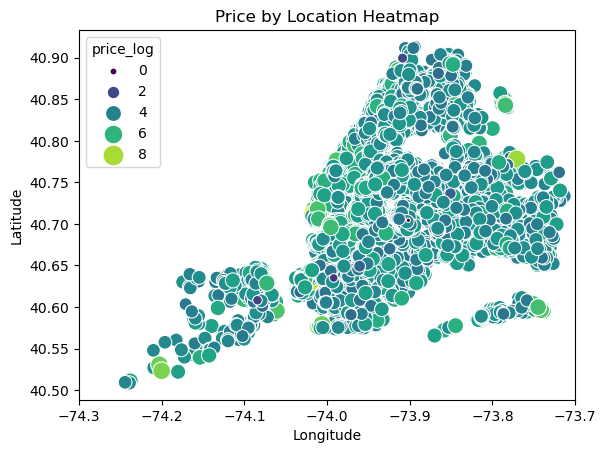

In [1821]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='longitude', y='latitude', hue='price_log', palette='viridis', size='price_log', sizes=(10, 200), data=final_no_outliers)
plt.title('Price by Location Heatmap')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim(-74.3, -73.7)
plt.show()

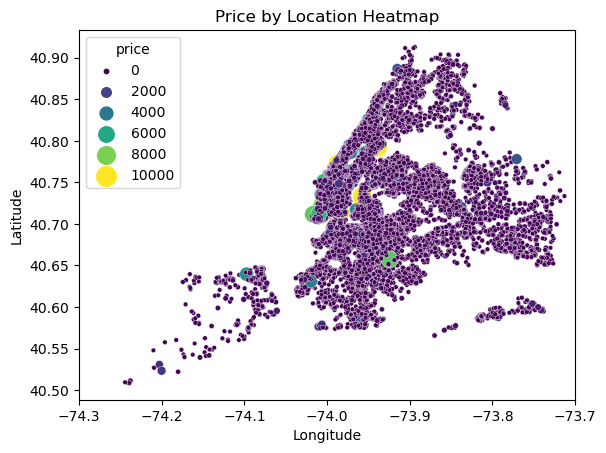

In [1822]:
sns.scatterplot(x='longitude', y='latitude', hue='price', palette='viridis', size='price', sizes=(10, 200), data=final)
plt.title('Price by Location Heatmap')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim(-74.3, -73.7)
plt.show()
# Manhattan area has the most expensive airbnbs. The prices above 4000 are pretty concentrated there.

In [1823]:
from sklearn.preprocessing import RobustScaler
robust_scaler1 = RobustScaler()

In [1824]:
final_copy.columns

Index(['id', 'neighbourhood', 'latitude', 'longitude', 'floor', 'noise(dB)',
       'days_since_last_rev_median', 'price_log', 'min_nights_boxcox',
       'num_revs_log', 'revs_month_yeojohnson', 'days_med_log',
       'neighbourhood_group_Brooklyn', 'neighbourhood_group_Manhattan',
       'neighbourhood_group_Queens', 'neighbourhood_group_Staten Island',
       'room_type_Private room', 'room_type_Shared room', 'floor_cat_1',
       'floor_cat_>1'],
      dtype='object')

In [1825]:
neighbourhood_prices = final.groupby('neighbourhood')['price'].mean()
print(neighbourhood_prices)

neighbourhood
Allerton            88.545455
Arden Heights       67.250000
Arrochar           105.600000
Arverne            176.117647
Astoria            119.239554
                      ...    
Willowbrook        249.000000
Windsor Terrace    138.508333
Woodhaven           63.347222
Woodlawn            55.750000
Woodside            87.645714
Name: price, Length: 220, dtype: float64


In [1826]:
test_data

,id,neighbourhood,latitude,longitude,floor,noise(dB),days_since_last_rev_median,min_nights_boxcox,num_revs_log,revs_month_yeojohnson,days_med_log,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room,floor_cat_1,floor_cat_>1
0,5178,Hell's Kitchen,40.76489,-73.98493,1,56.054278,1607.0,0.594246,6.066108,0.734004,7.382746,0,1,0,0,1,0,1,0
1,5803,South Slope,40.66829,-73.98779,1,69.056465,1607.0,1.027390,5.123964,0.552257,7.382746,1,0,0,0,1,0,1,0
2,6021,Upper West Side,40.79826,-73.96113,1,56.054278,1596.0,0.594246,4.736198,0.462953,7.375882,0,1,0,0,1,0,1,0
3,8490,Bedford-Stuyvesant,40.68371,-73.94028,1,69.056465,1612.0,0.594246,4.488636,0.411634,7.385851,1,0,0,0,0,0,1,0
4,8505,Windsor Terrace,40.65599,-73.97519,1,69.056465,1608.0,0.000000,2.995732,0.557222,7.383368,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9772,36472171,Inwood,40.86845,-73.92449,1,56.054278,1643.0,0.000000,0.000000,-0.000000,7.404888,0,1,0,0,1,0,1,0
9773,36472710,Briarwood,40.70786,-73.81448,5,62.478632,1643.0,0.000000,0.000000,-0.000000,7.404888,0,0,1,0,0,0,0,1
9774,36473253,Gravesend,40.59118,-73.97119,1,69.056465,1643.0,1.289788,0.000000,-0.000000,7.404888,1,0,0,0,0,1,1,0
9775,36480292,Williamsburg,40.71728,-73.94394,1,69.056465,1643.0,1.633117,0.000000,-0.000000,7.404888,1,0,0,0,0,0,1,0


In [1827]:
finall

,neighbourhood,neighbourhood_group,price
0,Midtown,Manhattan,225.0
1,Harlem,Manhattan,150.0
2,East Harlem,Manhattan,80.0
3,Murray Hill,Manhattan,200.0
4,Upper West Side,Manhattan,79.0
...,...,...,...
39126,Elmhurst,Queens,45.0
39127,Jamaica,Queens,65.0
39128,Far Rockaway,Queens,635.0
39129,Far Rockaway,Queens,635.0


In [1828]:
original_neighborhoods = set(finall['neighbourhood'].unique())
test_neighborhoods = set(test_data['neighbourhood'].unique())

not_present_neighborhoods = test_neighborhoods - original_neighborhoods

if not_present_neighborhoods:
    print("Neighborhoods not present in the original data:", not_present_neighborhoods)
else:
    print("All neighborhoods in test_data are present in the original data.")

Neighborhoods not present in the original data: {'Woodrow'}


In [1829]:
woodrow_rows = test_data[test_data['neighbourhood'] == 'Woodrow']
print(woodrow_rows)

          id neighbourhood  latitude  longitude  floor  noise(dB)  \
601  1798271       Woodrow  40.53884  -74.19826      1   47.96436   

     days_since_last_rev_median  min_nights_boxcox  num_revs_log  \
601                      1643.0           1.289788           0.0   

     revs_month_yeojohnson  days_med_log  neighbourhood_group_Brooklyn  \
601                   -0.0      7.404888                             0   

     neighbourhood_group_Manhattan  neighbourhood_group_Queens  \
601                              0                           0   

     neighbourhood_group_Staten Island  room_type_Private room  \
601                                  1                       0   

     room_type_Shared room  floor_cat_1  floor_cat_>1  
601                      0            1             0  


In [1830]:
average_prices = finall.groupby('neighbourhood')['price'].mean()
average_prices

neighbourhood
Allerton            88.545455
Arden Heights       67.250000
Arrochar           105.600000
Arverne            176.117647
Astoria            105.458856
                      ...    
Willowbrook        249.000000
Windsor Terrace    138.508333
Woodhaven           63.347222
Woodlawn            55.750000
Woodside            87.645714
Name: price, Length: 220, dtype: float64

In [1831]:
finall.head()
finall.shape

(39122, 3)

In [1832]:
final_copy.head()
final_copy.shape

(39122, 20)

In [1833]:
final_copy['neighbourhood_avg'] = finall['neighbourhood'].map(average_prices)
test_data['neighbourhood_avg'] = test3['neighbourhood'].map(average_prices)
neighbourhood_grp_avg = finall.groupby('neighbourhood_group')['price'].mean()
print(neighbourhood_grp_avg)
final_copy['neighbourhood_grp_avg'] = finall['neighbourhood_group'].map(neighbourhood_grp_avg)
test_data['neighbourhood_grp_avg'] = test3['neighbourhood_group'].map(neighbourhood_grp_avg)

neighbourhood_group
Bronx             85.339016
Brooklyn         123.661449
Manhattan        196.568975
Queens            98.568247
Staten Island    105.280000
Name: price, dtype: float64


In [1834]:
test_data.at[601, 'neighbourhood_avg'] = 105.28
woodrow_rows = test_data[test_data['neighbourhood'] == 'Woodrow']
print(woodrow_rows)

          id neighbourhood  latitude  longitude  floor  noise(dB)  \
601  1798271       Woodrow  40.53884  -74.19826      1   47.96436   

     days_since_last_rev_median  min_nights_boxcox  num_revs_log  \
601                      1643.0           1.289788           0.0   

     revs_month_yeojohnson  ...  neighbourhood_group_Brooklyn  \
601                   -0.0  ...                             0   

     neighbourhood_group_Manhattan  neighbourhood_group_Queens  \
601                              0                           0   

     neighbourhood_group_Staten Island  room_type_Private room  \
601                                  1                       0   

     room_type_Shared room  floor_cat_1  floor_cat_>1  neighbourhood_avg  \
601                      0            1             0             105.28   

     neighbourhood_grp_avg  
601                 105.28  

[1 rows x 21 columns]


In [1835]:
null_counts = test_data.isnull().sum()
print(null_counts)

id                                   0
neighbourhood                        0
latitude                             0
longitude                            0
floor                                0
noise(dB)                            0
days_since_last_rev_median           0
min_nights_boxcox                    0
num_revs_log                         0
revs_month_yeojohnson                0
days_med_log                         0
neighbourhood_group_Brooklyn         0
neighbourhood_group_Manhattan        0
neighbourhood_group_Queens           0
neighbourhood_group_Staten Island    0
room_type_Private room               0
room_type_Shared room                0
floor_cat_1                          0
floor_cat_>1                         0
neighbourhood_avg                    0
neighbourhood_grp_avg                0
dtype: int64


In [1836]:
final_copy.head()
final_copy.columns

Index(['id', 'neighbourhood', 'latitude', 'longitude', 'floor', 'noise(dB)',
       'days_since_last_rev_median', 'price_log', 'min_nights_boxcox',
       'num_revs_log', 'revs_month_yeojohnson', 'days_med_log',
       'neighbourhood_group_Brooklyn', 'neighbourhood_group_Manhattan',
       'neighbourhood_group_Queens', 'neighbourhood_group_Staten Island',
       'room_type_Private room', 'room_type_Shared room', 'floor_cat_1',
       'floor_cat_>1', 'neighbourhood_avg', 'neighbourhood_grp_avg'],
      dtype='object')

In [1837]:
final_copy.head()

,id,neighbourhood,latitude,longitude,floor,noise(dB),days_since_last_rev_median,price_log,min_nights_boxcox,num_revs_log,...,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room,floor_cat_1,floor_cat_>1,neighbourhood_avg,neighbourhood_grp_avg
0,2595,Midtown,40.75362,-73.98377,1,56.054278,1641.0,5.420535,0.000000,3.828641,...,0,1,0,0,0,0,1,0,280.369796,196.568975
1,3647,Harlem,40.80902,-73.94190,1,56.054278,1643.0,5.017280,0.861208,0.000000,...,0,1,0,0,1,0,1,0,119.241589,196.568975
2,5022,East Harlem,40.79851,-73.94399,1,56.054278,1824.0,4.394449,1.416369,2.302585,...,0,1,0,0,0,0,1,0,134.429354,196.568975
3,5099,Murray Hill,40.74767,-73.97500,1,56.054278,1609.0,5.303305,0.861208,4.317488,...,0,1,0,0,0,0,1,0,216.187342,196.568975
4,5203,Upper West Side,40.80178,-73.96723,1,56.054278,2310.0,4.382027,0.592964,4.779123,...,0,1,0,0,1,0,1,0,204.936972,196.568975


In [1838]:
final_copy.columns

Index(['id', 'neighbourhood', 'latitude', 'longitude', 'floor', 'noise(dB)',
       'days_since_last_rev_median', 'price_log', 'min_nights_boxcox',
       'num_revs_log', 'revs_month_yeojohnson', 'days_med_log',
       'neighbourhood_group_Brooklyn', 'neighbourhood_group_Manhattan',
       'neighbourhood_group_Queens', 'neighbourhood_group_Staten Island',
       'room_type_Private room', 'room_type_Shared room', 'floor_cat_1',
       'floor_cat_>1', 'neighbourhood_avg', 'neighbourhood_grp_avg'],
      dtype='object')

In [1839]:
final_copy.columns
numeric_vars = ['latitude', 'longitude', 'floor', 'noise(dB)', 'days_since_last_rev_median', 'price_log', 'min_nights_boxcox',
       'num_revs_log', 'revs_month_yeojohnson', 'days_med_log', 'neighbourhood_avg', 'neighbourhood_grp_avg']
final_copy[numeric_vars] = robust_scaler1.fit_transform(final_copy[numeric_vars])

In [1840]:
robust_scaler2 = RobustScaler()
numeric_vars = ['latitude', 'longitude', 'floor', 'noise(dB)', 'days_since_last_rev_median', 'min_nights_boxcox',
       'num_revs_log', 'revs_month_yeojohnson', 'days_med_log', 'neighbourhood_avg', 'neighbourhood_grp_avg']
test_data[numeric_vars] = robust_scaler2.fit_transform(test_data[numeric_vars])

In [1841]:
final_copy.head()

,id,neighbourhood,latitude,longitude,floor,noise(dB),days_since_last_rev_median,price_log,min_nights_boxcox,num_revs_log,...,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room,floor_cat_1,floor_cat_>1,neighbourhood_avg,neighbourhood_grp_avg
0,2595,Midtown,0.419188,-0.603248,0.0,-0.494098,-0.008782,0.821155,-0.522517,0.806453,...,0,1,0,0,0,0,1,0,1.580181,1.0
1,3647,Harlem,1.176873,0.294335,0.0,-0.494098,0.000000,0.383780,0.236375,-0.709403,...,0,1,0,0,1,0,1,0,-0.288277,1.0
2,5022,East Harlem,1.033132,0.249531,0.0,-0.494098,0.794731,-0.291750,0.725580,0.202249,...,0,1,0,0,0,0,1,0,-0.112158,1.0
3,5099,Murray Hill,0.337812,-0.415242,0.0,-0.494098,-0.149286,0.694006,0.236375,1.000000,...,0,1,0,0,0,0,1,0,0.835915,1.0
4,5203,Upper West Side,1.077854,-0.248674,0.0,-0.494098,2.928650,-0.305223,0.000000,1.182773,...,0,1,0,0,1,0,1,0,0.705455,1.0


In [1842]:
test_data.head()

,id,neighbourhood,latitude,longitude,floor,noise(dB),days_since_last_rev_median,min_nights_boxcox,num_revs_log,revs_month_yeojohnson,...,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room,floor_cat_1,floor_cat_>1,neighbourhood_avg,neighbourhood_grp_avg
0,5178,Hell's Kitchen,0.570821,-0.609135,0.0,-0.494098,-0.163636,-0.236660,1.720124,0.851913,...,0,1,0,0,1,0,1,0,0.706730,1.0
1,5803,South Slope,-0.755010,-0.669333,0.0,0.505902,-0.163636,0.143255,1.340978,0.524655,...,1,0,0,0,1,0,1,0,0.048854,0.0
2,6021,Upper West Side,1.028822,-0.108188,0.0,-0.494098,-0.213636,-0.236660,1.184929,0.363853,...,0,1,0,0,1,0,1,0,0.705455,1.0
3,8490,Bedford-Stuyvesant,-0.543371,0.330667,0.0,0.505902,-0.140909,-0.236660,1.085303,0.271446,...,1,0,0,0,0,0,1,0,-0.460944,0.0
4,8505,Windsor Terrace,-0.923827,-0.404125,0.0,0.505902,-0.159091,-0.757878,0.484514,0.533596,...,1,0,0,0,1,0,1,0,-0.064858,0.0


In [1843]:
columns_to_drop = ['neighbourhood']
final_copy = final_copy.drop(columns=columns_to_drop, axis=1)
test_data = test_data.drop(columns=columns_to_drop, axis=1)
print(final_copy)

             id  latitude  longitude  floor     noise(dB)  \
0          2595  0.419188  -0.603248    0.0 -4.940980e-01   
1          3647  1.176873   0.294335    0.0 -4.940980e-01   
2          5022  1.033132   0.249531    0.0 -4.940980e-01   
3          5099  0.337812  -0.415242    0.0 -4.940980e-01   
4          5203  1.077854  -0.248674    0.0 -4.940980e-01   
...         ...       ...        ...    ...           ...   
39126  36479723  0.298150   1.679833    4.0  0.000000e+00   
39127  36484363 -0.432181   3.155367    4.0  0.000000e+00   
39128  36487245 -1.683181   4.519642    2.0 -3.497796e-10   
39129  36487245 -1.683181   4.519642    2.0 -3.497796e-10   
39130  36487246 -0.253975   1.153974    1.0 -3.497796e-10   

       days_since_last_rev_median  price_log  min_nights_boxcox  num_revs_log  \
0                       -0.008782   0.821155          -0.522517      0.806453   
1                        0.000000   0.383780           0.236375     -0.709403   
2                       

In [1844]:
columns_to_drop = ['id']
final_copy = final_copy.drop(columns=columns_to_drop, axis=1)
test_data = test_data.drop(columns=columns_to_drop, axis=1)
print(final_copy)

       latitude  longitude  floor     noise(dB)  days_since_last_rev_median  \
0      0.419188  -0.603248    0.0 -4.940980e-01                   -0.008782   
1      1.176873   0.294335    0.0 -4.940980e-01                    0.000000   
2      1.033132   0.249531    0.0 -4.940980e-01                    0.794731   
3      0.337812  -0.415242    0.0 -4.940980e-01                   -0.149286   
4      1.077854  -0.248674    0.0 -4.940980e-01                    2.928650   
...         ...        ...    ...           ...                         ...   
39126  0.298150   1.679833    4.0  0.000000e+00                    0.000000   
39127 -0.432181   3.155367    4.0  0.000000e+00                    0.000000   
39128 -1.683181   4.519642    2.0 -3.497796e-10                    0.000000   
39129 -1.683181   4.519642    2.0 -3.497796e-10                    0.000000   
39130 -0.253975   1.153974    1.0 -3.497796e-10                    0.000000   

       price_log  min_nights_boxcox  num_revs_log  

In [1845]:
final_copy.head()

,latitude,longitude,floor,noise(dB),days_since_last_rev_median,price_log,min_nights_boxcox,num_revs_log,revs_month_yeojohnson,days_med_log,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room,floor_cat_1,floor_cat_>1,neighbourhood_avg,neighbourhood_grp_avg
0,0.419188,-0.603248,0.0,-0.494098,-0.008782,0.821155,-0.522517,0.806453,0.000000,-0.009216,0,1,0,0,0,0,1,0,1.580181,1.0
1,1.176873,0.294335,0.0,-0.494098,0.000000,0.383780,0.236375,-0.709403,-0.485228,0.000000,0,1,0,0,1,0,1,0,-0.288277,1.0
2,1.033132,0.249531,0.0,-0.494098,0.794731,-0.291750,0.725580,0.202249,-0.324016,0.790807,0,1,0,0,0,0,1,0,-0.112158,1.0
3,0.337812,-0.415242,0.0,-0.494098,-0.149286,0.694006,0.236375,1.000000,0.166243,-0.158226,0,1,0,0,0,0,1,0,0.835915,1.0
4,1.077854,-0.248674,0.0,-0.494098,2.928650,-0.305223,0.000000,1.182773,0.383462,2.578400,0,1,0,0,1,0,1,0,0.705455,1.0


In [1846]:
test_data.head()

,latitude,longitude,floor,noise(dB),days_since_last_rev_median,min_nights_boxcox,num_revs_log,revs_month_yeojohnson,days_med_log,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room,floor_cat_1,floor_cat_>1,neighbourhood_avg,neighbourhood_grp_avg
0,0.570821,-0.609135,0.0,-0.494098,-0.163636,-0.236660,1.720124,0.851913,-0.173169,0,1,0,0,1,0,1,0,0.706730,1.0
1,-0.755010,-0.669333,0.0,0.505902,-0.163636,0.143255,1.340978,0.524655,-0.173169,1,0,0,0,1,0,1,0,0.048854,0.0
2,1.028822,-0.108188,0.0,-0.494098,-0.213636,-0.236660,1.184929,0.363853,-0.226856,0,1,0,0,1,0,1,0,0.705455,1.0
3,-0.543371,0.330667,0.0,0.505902,-0.140909,-0.236660,1.085303,0.271446,-0.148888,1,0,0,0,0,0,1,0,-0.460944,0.0
4,-0.923827,-0.404125,0.0,0.505902,-0.159091,-0.757878,0.484514,0.533596,-0.168307,1,0,0,0,1,0,1,0,-0.064858,0.0


In [1847]:
from sklearn.model_selection import train_test_split

X = final_copy.drop(["price_log"], axis = 1)
y = final_copy[["price_log"]]

In [1848]:
X

,latitude,longitude,floor,noise(dB),days_since_last_rev_median,min_nights_boxcox,num_revs_log,revs_month_yeojohnson,days_med_log,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room,floor_cat_1,floor_cat_>1,neighbourhood_avg,neighbourhood_grp_avg
0,0.419188,-0.603248,0.0,-4.940980e-01,-0.008782,-0.522517,0.806453,0.000000,-0.009216,0,1,0,0,0,0,1,0,1.580181,1.000000
1,1.176873,0.294335,0.0,-4.940980e-01,0.000000,0.236375,-0.709403,-0.485228,0.000000,0,1,0,0,1,0,1,0,-0.288277,1.000000
2,1.033132,0.249531,0.0,-4.940980e-01,0.794731,0.725580,0.202249,-0.324016,0.790807,0,1,0,0,0,0,1,0,-0.112158,1.000000
3,0.337812,-0.415242,0.0,-4.940980e-01,-0.149286,0.236375,1.000000,0.166243,-0.158226,0,1,0,0,0,0,1,0,0.835915,1.000000
4,1.077854,-0.248674,0.0,-4.940980e-01,2.928650,0.000000,1.182773,0.383462,2.578400,0,1,0,0,1,0,1,0,0.705455,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39126,0.298150,1.679833,4.0,0.000000e+00,0.000000,-0.522517,-0.709403,-0.485228,0.000000,0,0,1,0,1,0,0,1,-0.699539,-0.344178
39127,-0.432181,3.155367,4.0,0.000000e+00,0.000000,-0.522517,-0.709403,-0.485228,0.000000,0,0,1,0,1,0,0,1,-0.559606,-0.344178
39128,-1.683181,4.519642,2.0,-3.497796e-10,0.000000,0.236375,-0.709403,-0.485228,0.000000,0,0,1,0,1,0,0,1,0.862518,-0.344178
39129,-1.683181,4.519642,2.0,-3.497796e-10,0.000000,0.236375,-0.709403,-0.485228,0.000000,0,0,1,0,1,0,0,1,0.862518,-0.344178


In [1849]:
y

,price_log
0,0.821155
1,0.383780
2,-0.291750
3,0.694006
4,-0.305223
...,...
39126,-0.905432
39127,-0.513872
39128,1.943364
39129,1.943364


In [1850]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

In [1851]:
X_train.head()

,latitude,longitude,floor,noise(dB),days_since_last_rev_median,min_nights_boxcox,num_revs_log,revs_month_yeojohnson,days_med_log,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room,floor_cat_1,floor_cat_>1,neighbourhood_avg,neighbourhood_grp_avg
37691,0.639929,1.125248,4.0,-0.076910,0.000000,-0.522517,-0.709403,-0.485228,0.000000,0,0,1,0,1,0,0,1,-0.569716,-0.344178
13109,0.002599,-0.673134,0.0,-0.494098,-0.193194,-0.522517,0.709403,0.911010,-0.205400,0,1,0,0,1,0,1,0,0.487946,1.000000
28992,-0.380210,0.496275,0.0,0.505902,0.057080,0.905594,0.274435,0.352168,0.059635,1,0,0,0,1,0,1,0,-0.460944,0.000000
29469,-0.699012,1.446594,0.0,0.505902,1.128430,0.000000,-0.434968,-0.324016,1.099718,1,0,0,0,1,0,1,0,-0.743676,0.000000
32469,-0.264916,0.657484,0.0,0.505902,-0.061471,-0.522517,-0.072186,0.720652,-0.064752,1,0,0,0,1,0,1,0,-0.695823,0.000000


In [1852]:
final_copy.columns

Index(['latitude', 'longitude', 'floor', 'noise(dB)',
       'days_since_last_rev_median', 'price_log', 'min_nights_boxcox',
       'num_revs_log', 'revs_month_yeojohnson', 'days_med_log',
       'neighbourhood_group_Brooklyn', 'neighbourhood_group_Manhattan',
       'neighbourhood_group_Queens', 'neighbourhood_group_Staten Island',
       'room_type_Private room', 'room_type_Shared room', 'floor_cat_1',
       'floor_cat_>1', 'neighbourhood_avg', 'neighbourhood_grp_avg'],
      dtype='object')

In [1853]:
y_train.head()

,price_log
37691,1.684583
13109,-0.692077
28992,-0.107475
29469,0.383780
32469,-0.772456


In [1854]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

lin_reg = LinearRegression()
lin_reg

LinearRegression()

In [1855]:
lin_reg.fit(X_train, y_train)

LinearRegression()

In [1856]:
from sklearn.metrics import mean_squared_error

predictions = lin_reg.predict(X_test)
predictions_train = lin_reg.predict(X_train)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.18721444661861716


In [1857]:
y_test

,price_log
27546,-0.793517
11779,0.419112
9636,-0.692077
12459,0.580330
7654,-0.497562
...,...
29367,-0.226783
37967,-0.513872
4306,0.746668
17596,1.128369


In [1858]:
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, predictions)
print("R-squared:", r_squared)

R-squared: 0.6680360567277047


In [1859]:
r_squared = r2_score(y_train, predictions_train)
print("R-squared:", r_squared)

R-squared: 0.6441021460018271


In [1860]:
from sklearn.tree import DecisionTreeRegressor

dec_tree = DecisionTreeRegressor(max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=5)
dec_tree.fit(X_train, y_train)

y_pred_train = dec_tree.predict(X_train)
mse = mean_squared_error(y_train, y_pred_train)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.14260601199956785


In [1861]:
r_squared = r2_score(y_train, y_pred_train)
print("R-squared:", r_squared)

R-squared: 0.750160350708499


In [1862]:
y_pred_test = dec_tree.predict(X_test)
mse = mean_squared_error(y_test, y_pred_test)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.1653572873965013


In [1863]:
r_squared = r2_score(y_test, y_pred_test)
print("R-squared:", r_squared)

R-squared: 0.7067926211657317


In [1864]:
# ADJUST PARAMETERS A LITTLE
dec_tree2 = DecisionTreeRegressor(max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=5)
dec_tree2.fit(X_train, y_train)

y_pred_train2 = dec_tree2.predict(X_train)
mse = mean_squared_error(y_train, y_pred_train2)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.14260601199956785


In [1865]:
r_squared2 = r2_score(y_train, y_pred_train2)
print("R-squared:", r_squared)

R-squared: 0.7067926211657317


In [1866]:
y_pred_test2 = dec_tree2.predict(X_test)
r_squared2 = r2_score(y_test, y_pred_test2)
print("R-squared:", r_squared2)

R-squared: 0.7067926211657317


In [1867]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X_train, np.ravel(y_train))

y_pred = random_forest.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.16032964958560347


In [1868]:
r_squared3 = r2_score(y_test, y_pred)
print("R-squared:", r_squared3)

R-squared: 0.7157075019518844


In [1869]:
X_test

,latitude,longitude,floor,noise(dB),days_since_last_rev_median,min_nights_boxcox,num_revs_log,revs_month_yeojohnson,days_med_log,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room,floor_cat_1,floor_cat_>1,neighbourhood_avg,neighbourhood_grp_avg
27546,-0.158786,0.047805,0.0,0.505902,0.000000,-0.522517,-0.709403,-0.485228,0.000000,1,0,0,0,1,0,1,0,0.000000,0.000000
11779,0.555818,-0.704003,0.0,-0.494098,-0.048299,0.000000,-0.160534,-0.143171,-0.050830,0,1,0,0,1,0,1,0,0.706730,1.000000
9636,1.267822,0.154778,0.0,-0.494098,-0.193194,0.236375,1.117840,0.926705,-0.205400,0,1,0,0,1,0,1,0,-0.288277,1.000000
12459,0.142647,-1.020419,0.0,-0.494098,-0.180022,0.236375,0.514419,0.684982,-0.191217,0,1,0,0,0,0,1,0,1.448336,1.000000
7654,1.438370,0.382228,0.0,-0.494098,-0.201976,0.236375,1.020572,0.746397,-0.214870,0,1,0,0,1,0,1,0,-0.288277,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29367,-0.506719,0.524358,0.0,0.505902,-0.035126,0.236375,0.274435,0.404462,-0.036933,1,0,0,0,1,0,1,0,-0.460944,0.000000
37967,0.760420,2.391339,4.0,0.000000,-0.197585,-0.522517,0.847306,1.022750,-0.210134,0,0,1,0,0,0,0,1,-0.618668,-0.344178
4306,0.498239,-0.658342,0.0,-0.494098,0.000000,0.236375,-0.709403,-0.485228,0.000000,0,1,0,0,1,0,1,0,1.310301,1.000000
17596,0.193798,0.057238,0.0,0.505902,1.734358,0.236375,0.061032,-0.324016,1.630312,1,0,0,0,1,0,1,0,0.031790,0.000000


In [1870]:
test_data

,latitude,longitude,floor,noise(dB),days_since_last_rev_median,min_nights_boxcox,num_revs_log,revs_month_yeojohnson,days_med_log,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room,floor_cat_1,floor_cat_>1,neighbourhood_avg,neighbourhood_grp_avg
0,0.570821,-0.609135,0.0,-0.494098,-0.163636,-0.236660,1.720124,0.851913,-0.173169,0,1,0,0,1,0,1,0,0.706730,1.000000
1,-0.755010,-0.669333,0.0,0.505902,-0.163636,0.143255,1.340978,0.524655,-0.173169,1,0,0,0,1,0,1,0,0.048854,0.000000
2,1.028822,-0.108188,0.0,-0.494098,-0.213636,-0.236660,1.184929,0.363853,-0.226856,0,1,0,0,1,0,1,0,0.705455,1.000000
3,-0.543371,0.330667,0.0,0.505902,-0.140909,-0.236660,1.085303,0.271446,-0.148888,1,0,0,0,0,0,1,0,-0.460944,0.000000
4,-0.923827,-0.404125,0.0,0.505902,-0.159091,-0.757878,0.484514,0.533596,-0.168307,1,0,0,0,1,0,1,0,-0.064858,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9772,1.992177,0.663018,0.0,-0.494098,0.000000,-0.757878,-0.721057,-0.469753,0.000000,0,1,0,0,1,0,1,0,-0.644816,1.000000
9773,-0.211913,2.978531,4.0,0.000000,0.000000,-0.757878,-0.721057,-0.469753,0.000000,0,0,1,0,0,0,0,1,-0.605333,-0.344178
9774,-1.813341,-0.319933,0.0,0.505902,0.000000,0.373407,-0.721057,-0.469753,0.000000,1,0,0,0,0,1,1,0,-0.762091,0.000000
9775,-0.082624,0.253631,0.0,0.505902,0.000000,0.674544,-0.721057,-0.469753,0.000000,1,0,0,0,0,0,1,0,0.000000,0.000000


In [1871]:
y_predicted = random_forest.predict(test_data)
y_predicted.shape

(9777,)

In [1872]:
test_data

,latitude,longitude,floor,noise(dB),days_since_last_rev_median,min_nights_boxcox,num_revs_log,revs_month_yeojohnson,days_med_log,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room,floor_cat_1,floor_cat_>1,neighbourhood_avg,neighbourhood_grp_avg
0,0.570821,-0.609135,0.0,-0.494098,-0.163636,-0.236660,1.720124,0.851913,-0.173169,0,1,0,0,1,0,1,0,0.706730,1.000000
1,-0.755010,-0.669333,0.0,0.505902,-0.163636,0.143255,1.340978,0.524655,-0.173169,1,0,0,0,1,0,1,0,0.048854,0.000000
2,1.028822,-0.108188,0.0,-0.494098,-0.213636,-0.236660,1.184929,0.363853,-0.226856,0,1,0,0,1,0,1,0,0.705455,1.000000
3,-0.543371,0.330667,0.0,0.505902,-0.140909,-0.236660,1.085303,0.271446,-0.148888,1,0,0,0,0,0,1,0,-0.460944,0.000000
4,-0.923827,-0.404125,0.0,0.505902,-0.159091,-0.757878,0.484514,0.533596,-0.168307,1,0,0,0,1,0,1,0,-0.064858,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9772,1.992177,0.663018,0.0,-0.494098,0.000000,-0.757878,-0.721057,-0.469753,0.000000,0,1,0,0,1,0,1,0,-0.644816,1.000000
9773,-0.211913,2.978531,4.0,0.000000,0.000000,-0.757878,-0.721057,-0.469753,0.000000,0,0,1,0,0,0,0,1,-0.605333,-0.344178
9774,-1.813341,-0.319933,0.0,0.505902,0.000000,0.373407,-0.721057,-0.469753,0.000000,1,0,0,0,0,1,1,0,-0.762091,0.000000
9775,-0.082624,0.253631,0.0,0.505902,0.000000,0.674544,-0.721057,-0.469753,0.000000,1,0,0,0,0,0,1,0,0.000000,0.000000


In [1873]:
test4 = pd.read_csv('test_data.csv')
ids = test4['id']
ids

0           5178
1           5803
2           6021
3           8490
4           8505
          ...   
9772    36472171
9773    36472710
9774    36473253
9775    36480292
9776    36482416
Name: id, Length: 9777, dtype: int64

In [1874]:
test_data.shape

(9777, 19)

In [1875]:
test_data['price_log'] = y_predicted
test_data

,latitude,longitude,floor,noise(dB),days_since_last_rev_median,min_nights_boxcox,num_revs_log,revs_month_yeojohnson,days_med_log,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room,floor_cat_1,floor_cat_>1,neighbourhood_avg,neighbourhood_grp_avg,price_log
0,0.570821,-0.609135,0.0,-0.494098,-0.163636,-0.236660,1.720124,0.851913,-0.173169,0,1,0,0,1,0,1,0,0.706730,1.000000,0.244658
1,-0.755010,-0.669333,0.0,0.505902,-0.163636,0.143255,1.340978,0.524655,-0.173169,1,0,0,0,1,0,1,0,0.048854,0.000000,-0.178018
2,1.028822,-0.108188,0.0,-0.494098,-0.213636,-0.236660,1.184929,0.363853,-0.226856,0,1,0,0,1,0,1,0,0.705455,1.000000,-0.162243
3,-0.543371,0.330667,0.0,0.505902,-0.140909,-0.236660,1.085303,0.271446,-0.148888,1,0,0,0,0,0,1,0,-0.460944,0.000000,0.266439
4,-0.923827,-0.404125,0.0,0.505902,-0.159091,-0.757878,0.484514,0.533596,-0.168307,1,0,0,0,1,0,1,0,-0.064858,0.000000,-0.694335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9772,1.992177,0.663018,0.0,-0.494098,0.000000,-0.757878,-0.721057,-0.469753,0.000000,0,1,0,0,1,0,1,0,-0.644816,1.000000,-0.097814
9773,-0.211913,2.978531,4.0,0.000000,0.000000,-0.757878,-0.721057,-0.469753,0.000000,0,0,1,0,0,0,0,1,-0.605333,-0.344178,0.234355
9774,-1.813341,-0.319933,0.0,0.505902,0.000000,0.373407,-0.721057,-0.469753,0.000000,1,0,0,0,0,1,1,0,-0.762091,0.000000,-1.377435
9775,-0.082624,0.253631,0.0,0.505902,0.000000,0.674544,-0.721057,-0.469753,0.000000,1,0,0,0,0,0,1,0,0.000000,0.000000,0.444969


In [1876]:
numeric_vars = ['latitude', 'longitude', 'floor', 'noise(dB)', 'days_since_last_rev_median', 'price_log', 'min_nights_boxcox',
       'num_revs_log', 'revs_month_yeojohnson', 'days_med_log', 'neighbourhood_avg', 'neighbourhood_grp_avg']
test_data[numeric_vars] = robust_scaler1.inverse_transform(test_data[numeric_vars])
test_data

,latitude,longitude,floor,noise(dB),days_since_last_rev_median,min_nights_boxcox,num_revs_log,revs_month_yeojohnson,days_med_log,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room,floor_cat_1,floor_cat_>1,neighbourhood_avg,neighbourhood_grp_avg,price_log
0,40.764707,-73.984045,1.0,56.054278,1605.731818,0.324398,6.136327,0.751904,7.382016,0,1,0,0,1,0,1,0,205.046954,196.568975,4.889011
1,40.667766,-73.986853,1.0,69.056465,1605.731818,0.755533,5.178705,0.567880,7.382016,1,0,0,0,1,0,1,0,148.314410,123.661449,4.499309
2,40.798195,-73.960677,1.0,56.054278,1594.344318,0.324398,4.784570,0.477457,7.374925,0,1,0,0,1,0,1,0,204.936972,196.568975,4.513853
3,40.683240,-73.940205,1.0,69.056465,1610.907955,0.324398,4.532941,0.425495,7.385223,1,0,0,0,0,0,1,0,104.351523,123.661449,4.909093
4,40.655422,-73.974481,1.0,69.056465,1606.767045,-0.267093,3.015511,0.572908,7.382658,1,0,0,0,1,0,1,0,138.508333,123.661449,4.023270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9772,40.868633,-73.924702,1.0,56.054278,1643.000000,-0.267093,-0.029435,0.008702,7.404888,0,1,0,0,1,0,1,0,88.495098,196.568975,4.573255
9773,40.707475,-73.816689,5.0,62.478632,1643.000000,-0.267093,-0.029435,0.008702,7.404888,0,0,1,0,0,0,0,1,91.900000,98.568247,4.879512
9774,40.590383,-73.970554,1.0,69.056465,1643.000000,1.016715,-0.029435,0.008702,7.404888,1,0,0,0,0,1,1,0,78.381818,123.661449,3.393459
9775,40.716929,-73.943799,1.0,69.056465,1643.000000,1.358452,-0.029435,0.008702,7.404888,1,0,0,0,0,0,1,0,144.101431,123.661449,5.073695


In [1877]:
test_data['price_log'] = np.expm1(test_data['price_log'])
test_data

,latitude,longitude,floor,noise(dB),days_since_last_rev_median,min_nights_boxcox,num_revs_log,revs_month_yeojohnson,days_med_log,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room,floor_cat_1,floor_cat_>1,neighbourhood_avg,neighbourhood_grp_avg,price_log
0,40.764707,-73.984045,1.0,56.054278,1605.731818,0.324398,6.136327,0.751904,7.382016,0,1,0,0,1,0,1,0,205.046954,196.568975,131.822108
1,40.667766,-73.986853,1.0,69.056465,1605.731818,0.755533,5.178705,0.567880,7.382016,1,0,0,0,1,0,1,0,148.314410,123.661449,88.954912
2,40.798195,-73.960677,1.0,56.054278,1594.344318,0.324398,4.784570,0.477457,7.374925,0,1,0,0,1,0,1,0,204.936972,196.568975,90.272799
3,40.683240,-73.940205,1.0,69.056465,1610.907955,0.324398,4.532941,0.425495,7.385223,1,0,0,0,0,0,1,0,104.351523,123.661449,134.516456
4,40.655422,-73.974481,1.0,69.056465,1606.767045,-0.267093,3.015511,0.572908,7.382658,1,0,0,0,1,0,1,0,138.508333,123.661449,54.883558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9772,40.868633,-73.924702,1.0,56.054278,1643.000000,-0.267093,-0.029435,0.008702,7.404888,0,1,0,0,1,0,1,0,88.495098,196.568975,95.858906
9773,40.707475,-73.816689,5.0,62.478632,1643.000000,-0.267093,-0.029435,0.008702,7.404888,0,0,1,0,0,0,0,1,91.900000,98.568247,130.566447
9774,40.590383,-73.970554,1.0,69.056465,1643.000000,1.016715,-0.029435,0.008702,7.404888,1,0,0,0,0,1,1,0,78.381818,123.661449,28.768748
9775,40.716929,-73.943799,1.0,69.056465,1643.000000,1.358452,-0.029435,0.008702,7.404888,1,0,0,0,0,0,1,0,144.101431,123.661449,158.763628


In [1882]:
finaldata = pd.DataFrame()
finaldata['ID'] = ids
finaldata['price'] = test_data['price_log']
finaldata

,ID,price
0,5178,131.822108
1,5803,88.954912
2,6021,90.272799
3,8490,134.516456
4,8505,54.883558
...,...,...
9772,36472171,95.858906
9773,36472710,130.566447
9774,36473253,28.768748
9775,36480292,158.763628


In [1883]:
# Save DataFrame to a CSV file with specified format
finaldata.to_csv('final_submission.csv', index=False, columns=['ID', 'price'])

In [1546]:
# Getting rid of some variables
X = final_copy.drop(["price_log", 'longitude', 'floor', 'days_since_last_rev_median', 'days_med_log'], axis = 1)
X

,latitude,noise(dB),min_nights_boxcox,num_revs_log,revs_month_yeojohnson,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room,floor_cat_1,floor_cat_>1,neighbourhood_avg,neighbourhood_grp_avg
0,0.419188,-4.940980e-01,-0.522517,0.806453,0.000000,0,1,0,0,0,0,1,0,1.580181,1.000000
1,1.176873,-4.940980e-01,0.236375,-0.709403,-0.485228,0,1,0,0,1,0,1,0,-0.288277,1.000000
2,1.033132,-4.940980e-01,0.725580,0.202249,-0.324016,0,1,0,0,0,0,1,0,-0.112158,1.000000
3,0.337812,-4.940980e-01,0.236375,1.000000,0.166243,0,1,0,0,0,0,1,0,0.835915,1.000000
4,1.077854,-4.940980e-01,0.000000,1.182773,0.383462,0,1,0,0,1,0,1,0,0.705455,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39126,0.298150,0.000000e+00,-0.522517,-0.709403,-0.485228,0,0,1,0,1,0,0,1,-0.699539,-0.344178
39127,-0.432181,0.000000e+00,-0.522517,-0.709403,-0.485228,0,0,1,0,1,0,0,1,-0.559606,-0.344178
39128,-1.683181,-3.497796e-10,0.236375,-0.709403,-0.485228,0,0,1,0,1,0,0,1,0.862518,-0.344178
39129,-1.683181,-3.497796e-10,0.236375,-0.709403,-0.485228,0,0,1,0,1,0,0,1,0.862518,-0.344178


In [1547]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)
X_train

,latitude,noise(dB),min_nights_boxcox,num_revs_log,revs_month_yeojohnson,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room,floor_cat_1,floor_cat_>1,neighbourhood_avg,neighbourhood_grp_avg
37691,0.639929,-0.076910,-0.522517,-0.709403,-0.485228,0,0,1,0,1,0,0,1,-0.569716,-0.344178
13109,0.002599,-0.494098,-0.522517,0.709403,0.911010,0,1,0,0,1,0,1,0,0.487946,1.000000
28992,-0.380210,0.505902,0.905594,0.274435,0.352168,1,0,0,0,1,0,1,0,-0.460944,0.000000
29469,-0.699012,0.505902,0.000000,-0.434968,-0.324016,1,0,0,0,1,0,1,0,-0.743676,0.000000
32469,-0.264916,0.505902,-0.522517,-0.072186,0.720652,1,0,0,0,1,0,1,0,-0.695823,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25370,-0.410982,0.505902,0.379128,0.924634,0.728088,1,0,0,0,0,0,1,0,-0.695823,0.000000
25549,-0.478955,0.505902,0.987029,-0.434968,-0.416911,1,0,0,0,0,0,1,0,0.968378,0.000000
11515,1.500872,-0.494098,0.837813,0.239985,0.292679,0,1,0,0,1,0,1,0,-0.634539,1.000000
1689,0.194892,-0.494098,-0.522517,0.274435,-0.215265,0,1,0,0,0,0,1,0,1.448336,1.000000


In [1548]:
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_test)
predictions_train = lin_reg.predict(X_train)
r_squared = r2_score(y_test, predictions)
print("R-squared:", r_squared)

R-squared: 0.6535725039711644


In [1549]:
dec_tree = DecisionTreeRegressor(max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=5)
dec_tree.fit(X_train, y_train)

y_pred_train = dec_tree.predict(X_train)
r_squared = r2_score(y_train, y_pred_train)
print("R-squared:", r_squared)

R-squared: 0.74740244465315


In [1550]:
y_pred_test = dec_tree.predict(X_test)
r_squared = r2_score(y_test, y_pred_test)
print("R-squared:", r_squared)

R-squared: 0.7054866388808547


In [1551]:
X_test

,latitude,noise(dB),min_nights_boxcox,num_revs_log,revs_month_yeojohnson,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room,floor_cat_1,floor_cat_>1,neighbourhood_avg,neighbourhood_grp_avg
27546,-0.158786,0.505902,-0.522517,-0.709403,-0.485228,1,0,0,0,1,0,1,0,0.000000,0.000000
11779,0.555818,-0.494098,0.000000,-0.160534,-0.143171,0,1,0,0,1,0,1,0,0.706730,1.000000
9636,1.267822,-0.494098,0.236375,1.117840,0.926705,0,1,0,0,1,0,1,0,-0.288277,1.000000
12459,0.142647,-0.494098,0.236375,0.514419,0.684982,0,1,0,0,0,0,1,0,1.448336,1.000000
7654,1.438370,-0.494098,0.236375,1.020572,0.746397,0,1,0,0,1,0,1,0,-0.288277,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29367,-0.506719,0.505902,0.236375,0.274435,0.404462,1,0,0,0,1,0,1,0,-0.460944,0.000000
37967,0.760420,0.000000,-0.522517,0.847306,1.022750,0,0,1,0,0,0,0,1,-0.618668,-0.344178
4306,0.498239,-0.494098,0.236375,-0.709403,-0.485228,0,1,0,0,1,0,1,0,1.310301,1.000000
17596,0.193798,0.505902,0.236375,0.061032,-0.324016,1,0,0,0,1,0,1,0,0.031790,0.000000


In [1552]:
X_train

,latitude,noise(dB),min_nights_boxcox,num_revs_log,revs_month_yeojohnson,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room,floor_cat_1,floor_cat_>1,neighbourhood_avg,neighbourhood_grp_avg
37691,0.639929,-0.076910,-0.522517,-0.709403,-0.485228,0,0,1,0,1,0,0,1,-0.569716,-0.344178
13109,0.002599,-0.494098,-0.522517,0.709403,0.911010,0,1,0,0,1,0,1,0,0.487946,1.000000
28992,-0.380210,0.505902,0.905594,0.274435,0.352168,1,0,0,0,1,0,1,0,-0.460944,0.000000
29469,-0.699012,0.505902,0.000000,-0.434968,-0.324016,1,0,0,0,1,0,1,0,-0.743676,0.000000
32469,-0.264916,0.505902,-0.522517,-0.072186,0.720652,1,0,0,0,1,0,1,0,-0.695823,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25370,-0.410982,0.505902,0.379128,0.924634,0.728088,1,0,0,0,0,0,1,0,-0.695823,0.000000
25549,-0.478955,0.505902,0.987029,-0.434968,-0.416911,1,0,0,0,0,0,1,0,0.968378,0.000000
11515,1.500872,-0.494098,0.837813,0.239985,0.292679,0,1,0,0,1,0,1,0,-0.634539,1.000000
1689,0.194892,-0.494098,-0.522517,0.274435,-0.215265,0,1,0,0,0,0,1,0,1.448336,1.000000
